## Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


#### This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol
Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/winequality-red.csv")
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.tail(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [4]:
df.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1145            8.2             0.200         0.43             2.5      0.076   
375            11.5             0.540         0.71             4.4      0.124   
80              6.2             0.450         0.20             1.6      0.069   
399             8.7             0.765         0.22             2.3      0.064   
223             8.6             0.645         0.25             2.0      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1145                 31.0                  51.0  0.99672  3.53       0.81   
375                   6.0                  15.0  0.99840  3.01       0.83   
80                    3.0                  15.0  0.99580  3.41       0.56   
399                   9.0                  42.0  0.99630  3.10       0.55   
223                   8.0                  28.0  0.99815  3.28       0.60   

      alcohol  quality  
1145     10.4        6  
375      11.8        7  
80        9.2        5  
399       9.4        5  
223      10.0        6

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### About the columns

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [6]:
df.shape

(1599, 12)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

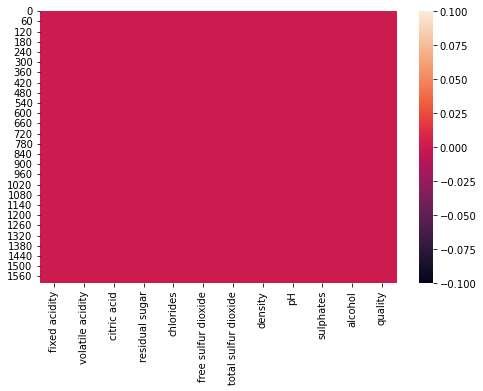

In [8]:
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull())

#### From above code we find that no null values present in the dataset

#### 

In [9]:
df.dtypes  #checking columns values data types

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

#### As per above observations we can find that  column Quality dataset having the categorical data while rest dataset are continuos in nature.

#### 

In [11]:
df.describe()   # checking description of the dataset 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### From above code we having a short glimpse of the data set that

Max values of dataset residual sugar, free sulfure dioxide and total sulfur dioxide are 15.5, 72.0 and 289.0 respectively.
While there means are very low which indicates that dataset having outlier present in above mentioned columns

In [12]:
df.quality.unique()  #checking  categorical values 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
# Quality unique values count

df['quality'].value_counts()

# 5    681
# 6    638
# 7    199
# 4     53
# 8     18
# 3     10
# Name: quality, dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

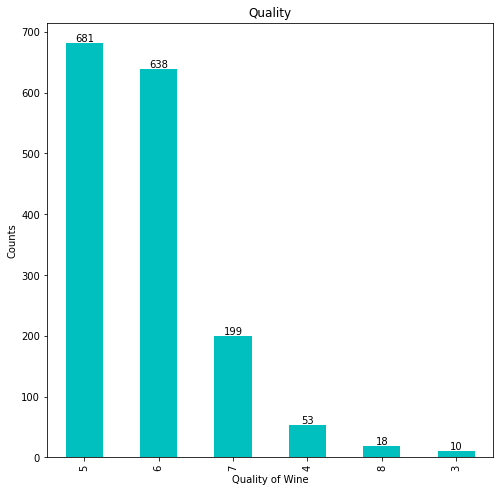

In [14]:
quality = df['quality'].value_counts()
plt.figure(figsize = (8, 8))
df_quality = quality.plot(kind = 'bar', color = 'c' )
df_quality.set_title("Quality")
df_quality.set_xlabel("Quality of Wine")
df_quality.set_ylabel("Counts")

for i in df_quality.containers:
    df_quality.bar_label(i)

<AxesSubplot:ylabel='quality'>

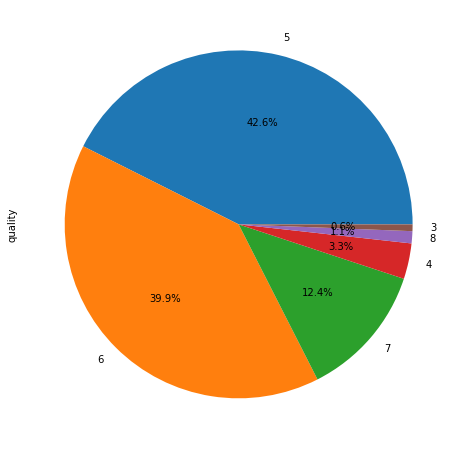

In [15]:
plt.figure(figsize = (8,8))
df['quality'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

<AxesSubplot:xlabel='quality', ylabel='count'>

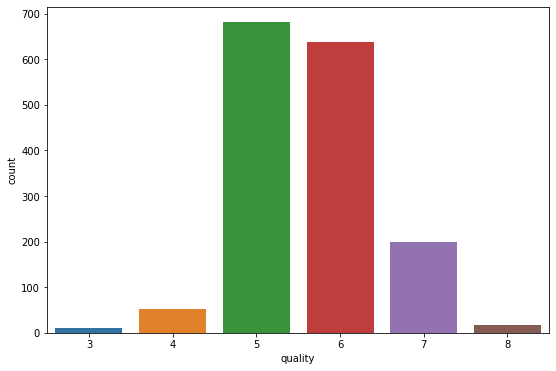

In [16]:
plt.figure(figsize = (9,6))
sns.countplot('quality', data = df)

#### Replacing Wine Quality to GOOD---> 1 and NOTGOOD---> 0

In [17]:
df['quality'].replace([7, 8], 1, inplace = True)       # converting values to 1 as good quality
df['quality'].replace([3, 4, 5, 6], 0, inplace = True) # converting values to 0 as not good quality

df['quality'].unique()

array([0, 1], dtype=int64)

In [18]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

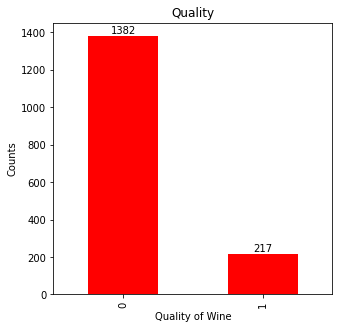

In [19]:
plt.figure(figsize = (5, 5))
df_quality_wine = df['quality'].value_counts()
df_quality1 = df_quality_wine.plot(kind = 'bar', color = 'r')
df_quality1.set_title("Quality")
df_quality1.set_xlabel("Quality of Wine")
df_quality1.set_ylabel("Counts")

for i in df_quality1.containers:
    df_quality1.bar_label(i)

In [20]:
df.sample(5) # checking dataset with 0 and 1 quality values

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1124            6.5              0.58         0.00             2.2      0.096   
323            10.3              0.59         0.42             2.8      0.090   
26              7.6              0.41         0.24             1.8      0.080   
1386            7.4              0.64         0.07             1.8      0.100   
822             6.7              0.54         0.13             2.0      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1124                  3.0                  13.0  0.99557  3.62       0.62   
323                  35.0                  73.0  0.99900  3.28       0.70   
26                    4.0                  11.0  0.99620  3.28       0.59   
1386                  8.0                  23.0  0.99610  3.30       0.58   
822                  15.0                  36.0  0.99730  3.61       0.64   

      alcohol  quality  
1124     11.5        0  
323       9.5        0  
26        9.5        0  
1386      9.6        0  
822       9.8        0

In [21]:
df_continuos_columns = df.select_dtypes(include = 'float').columns
df_continuos_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Scatter Plot for continuous values

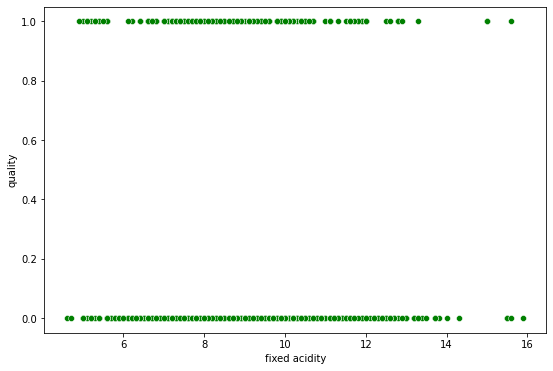

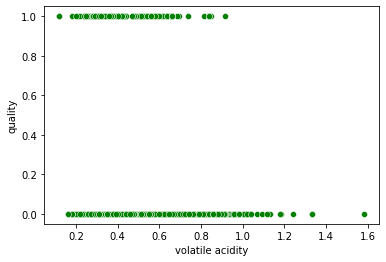

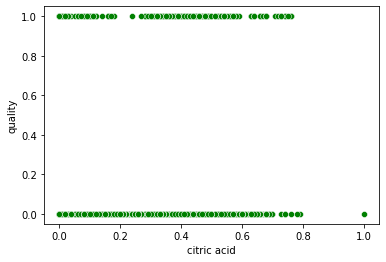

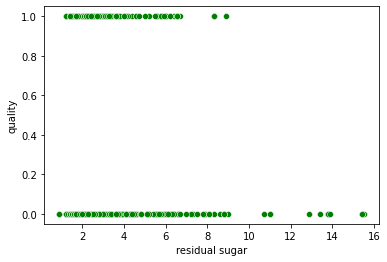

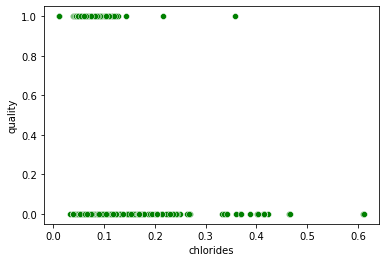

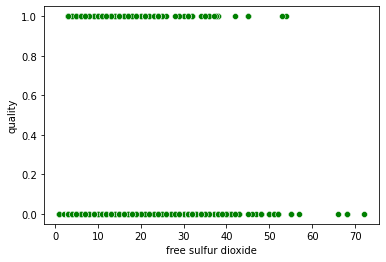

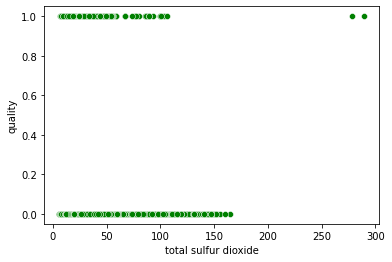

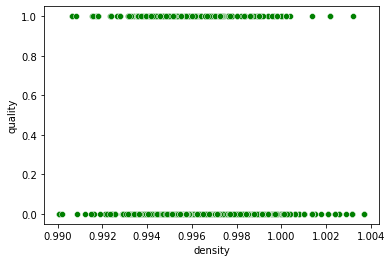

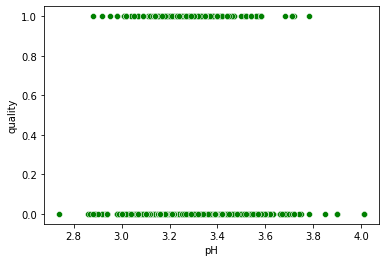

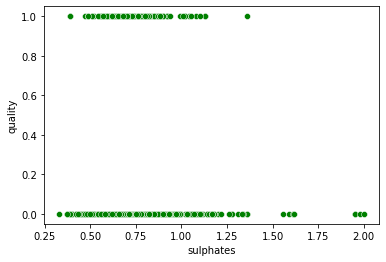

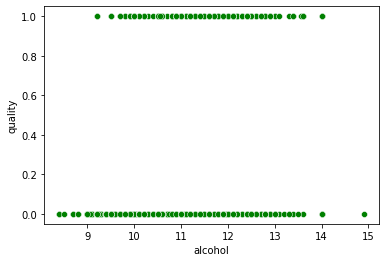

In [247]:
plt.figure(figsize = (9,6))
for i in df_continuos_columns:
    sns.scatterplot(x = i, y = 'quality', data = df, color = 'g')
    plt.show()

#### From above observations we find out that more values are present in 0 i.e Not good quality wine

#### 

## Bivariate Graphs with respect to each continuous values

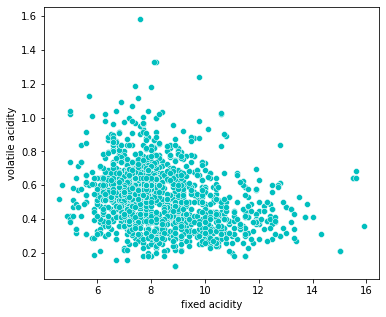

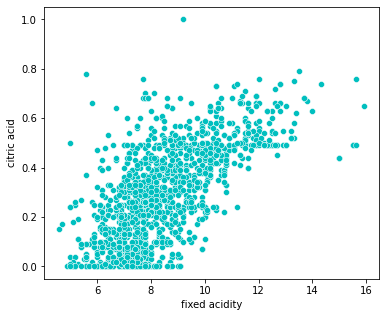

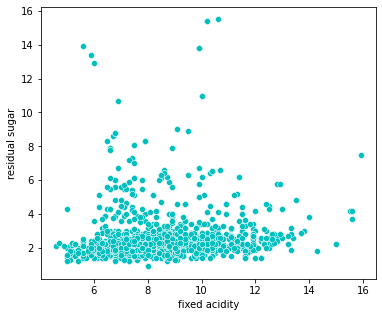

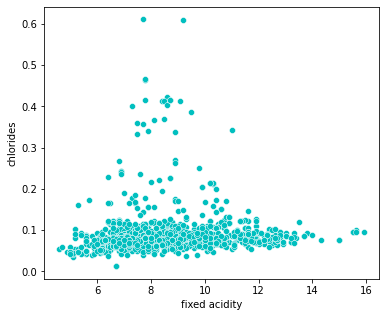

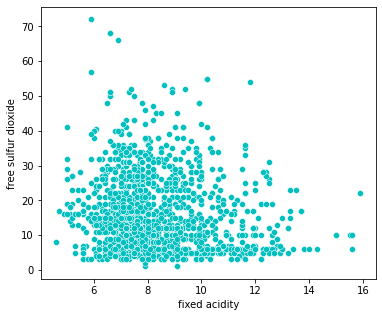

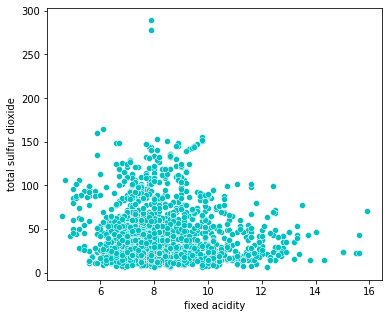

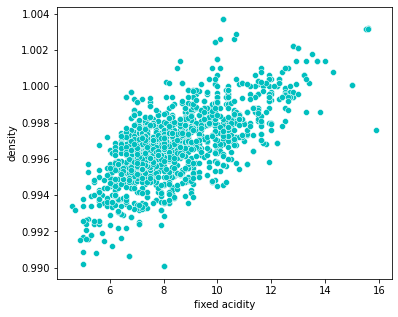

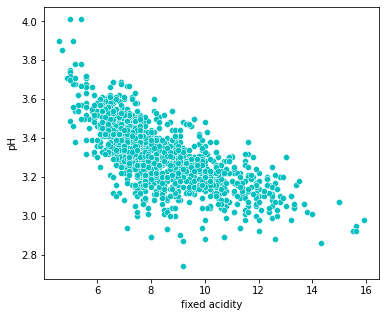

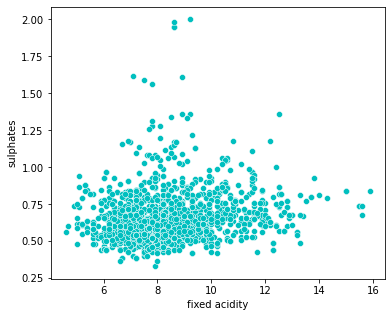

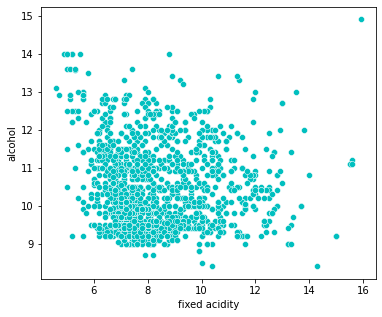

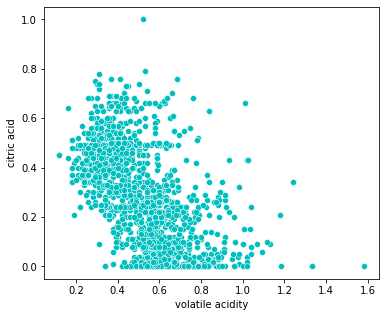

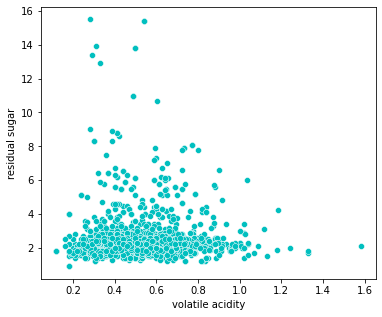

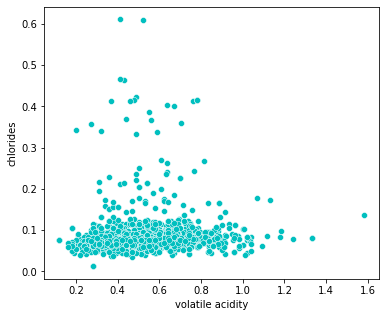

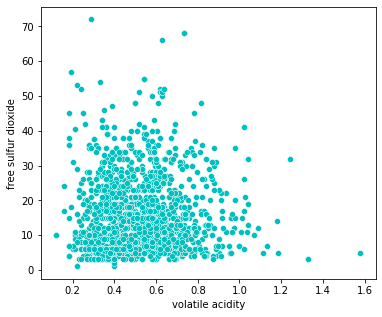

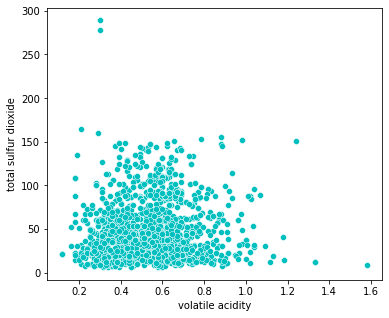

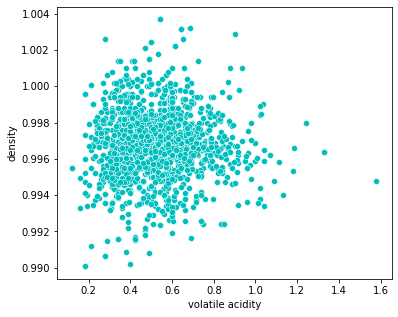

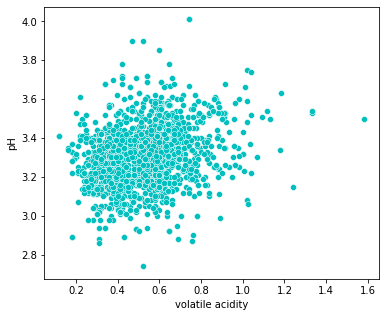

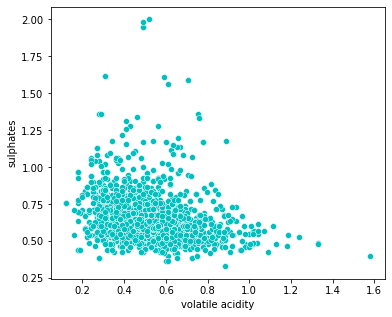

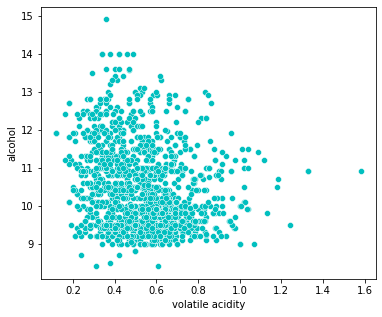

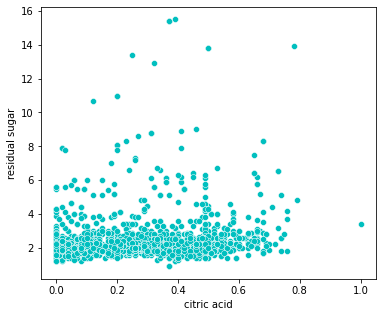

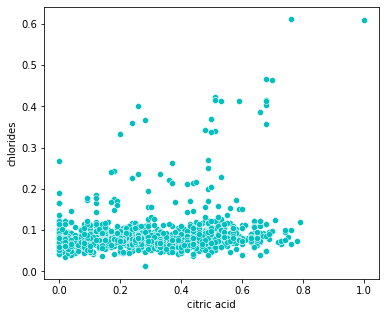

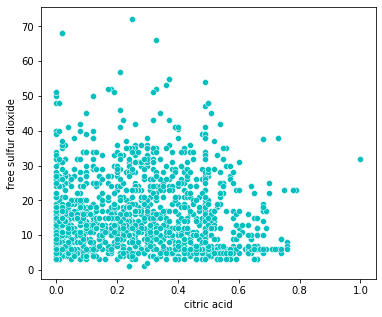

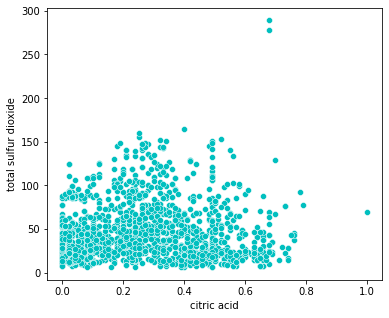

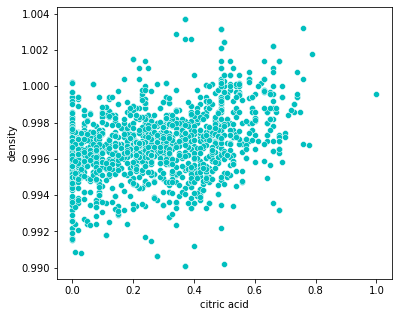

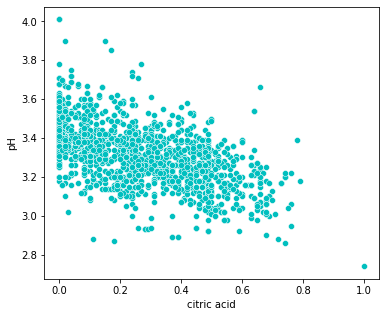

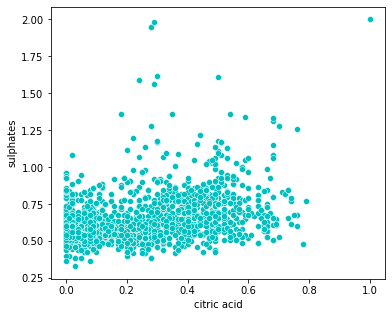

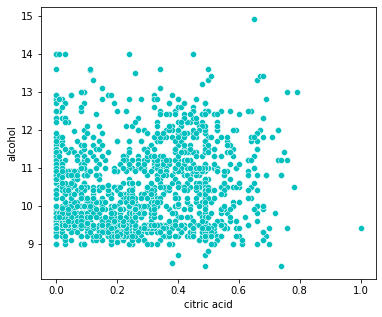

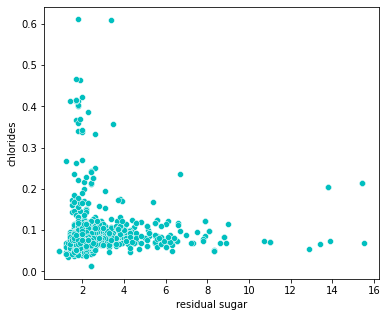

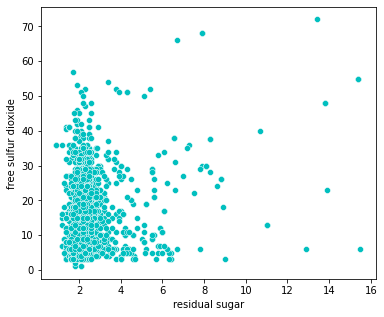

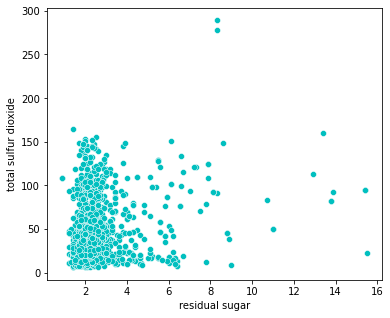

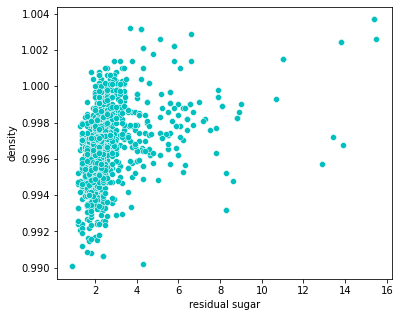

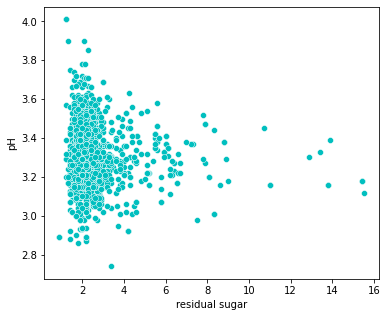

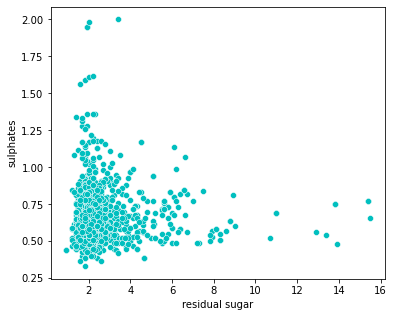

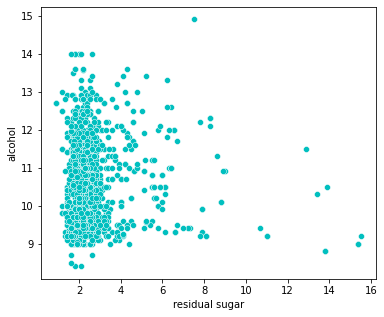

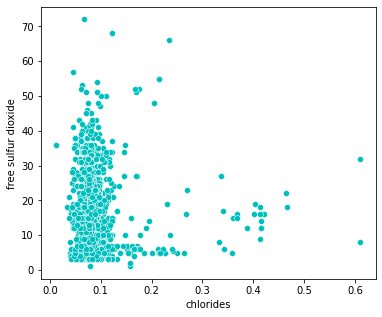

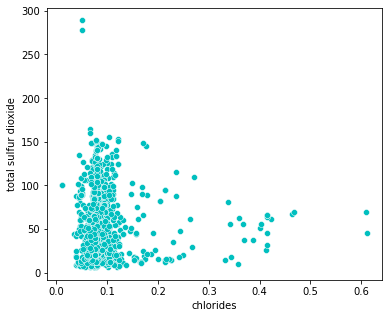

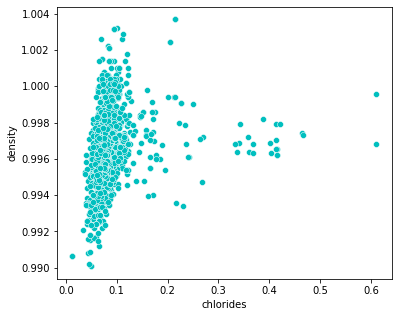

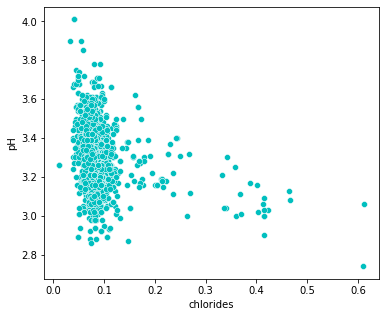

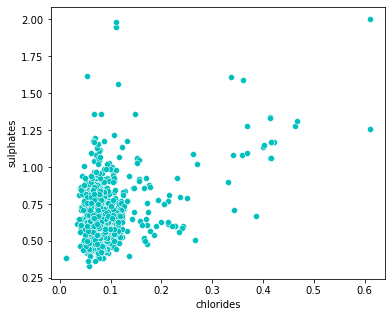

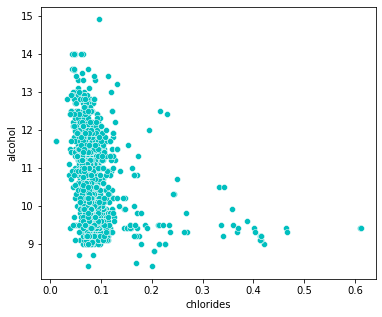

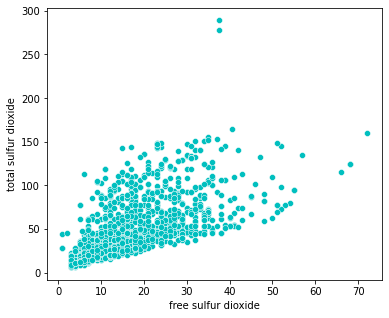

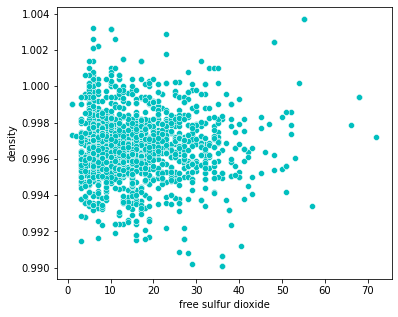

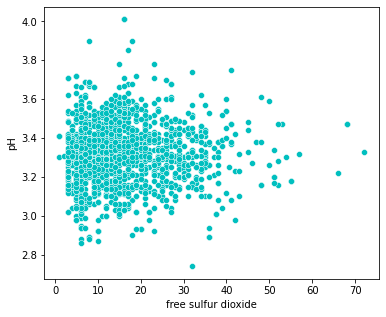

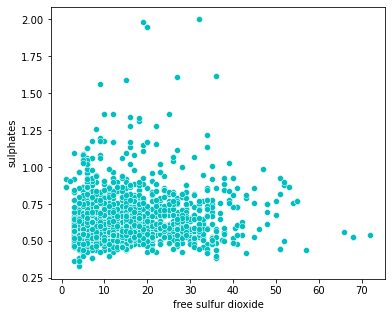

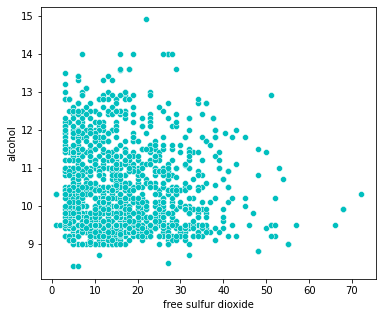

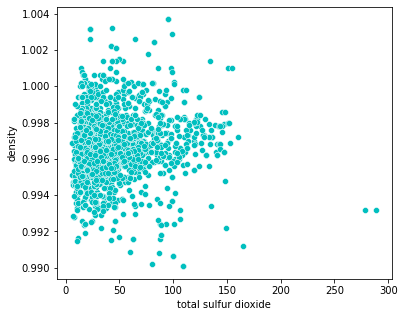

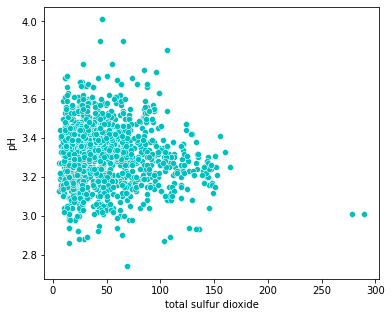

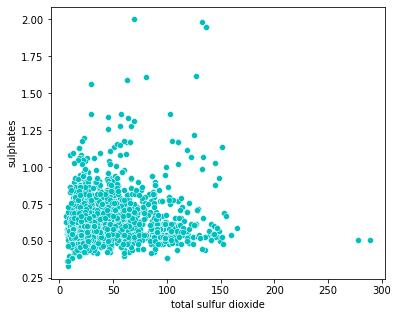

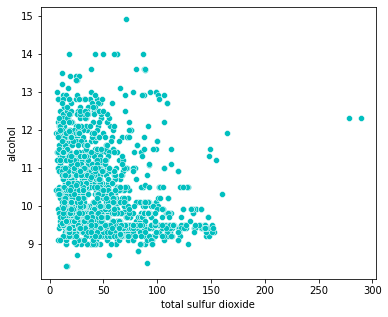

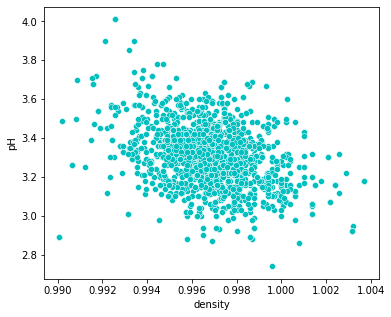

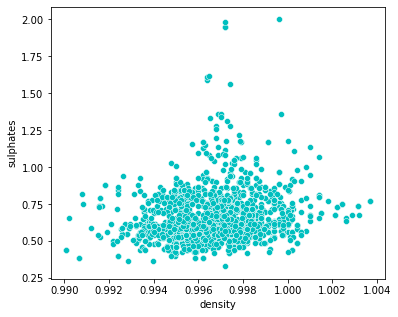

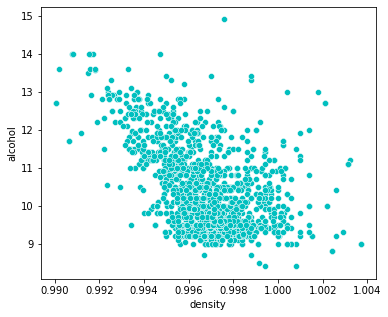

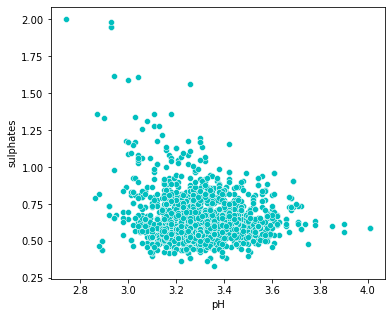

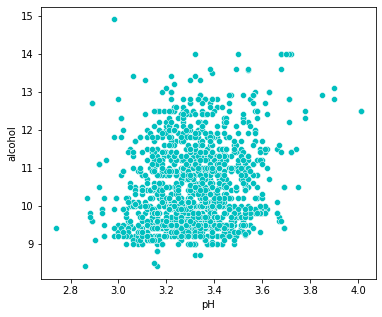

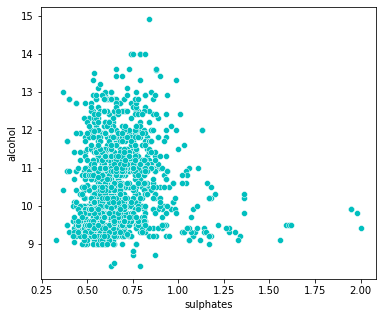

In [111]:
for i in range(len(df_continuos_columns)):
    for j in df_continuos_columns[i+1:]:
        plt.figure(figsize = (6,5))
        sns.scatterplot(df_continuos_columns[i], df[j], data = df, color = 'c')
        plt.show()

#### 

### Stripplot/Swarmplot

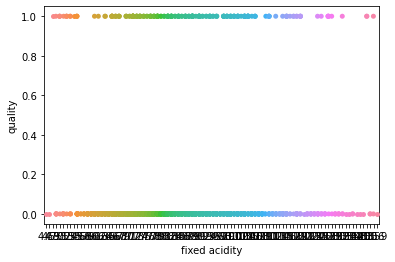

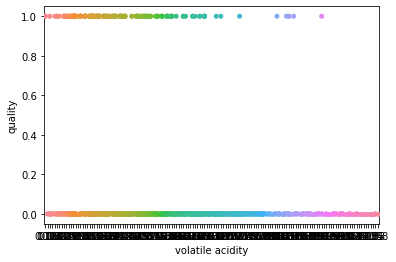

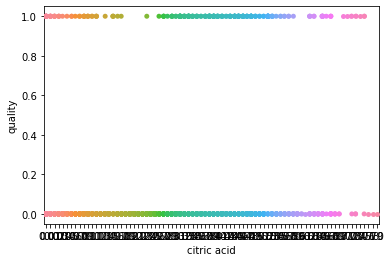

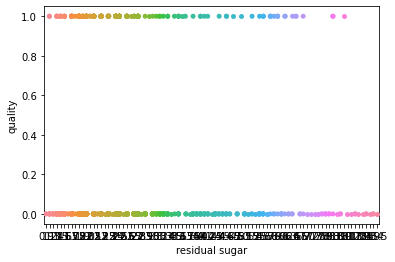

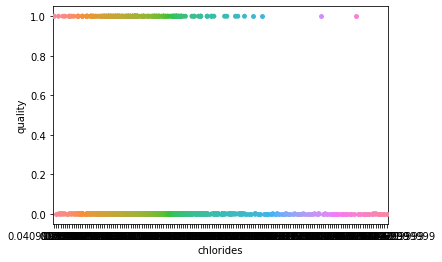

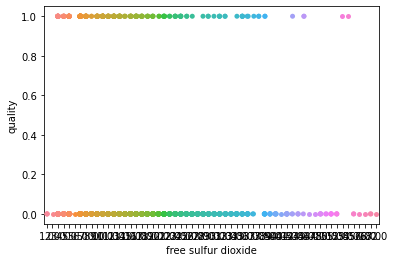

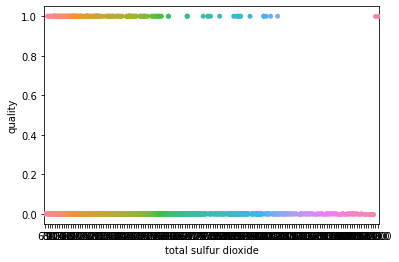

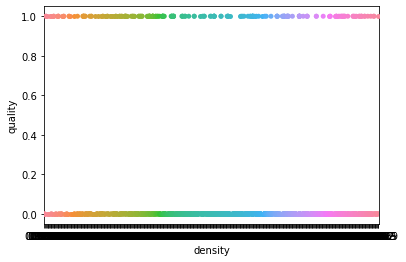

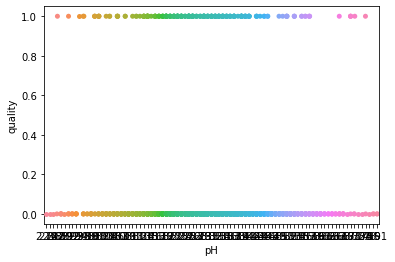

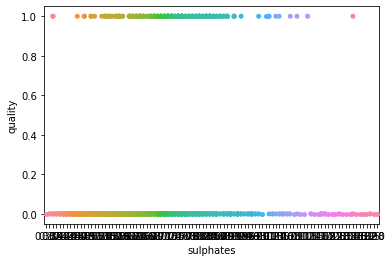

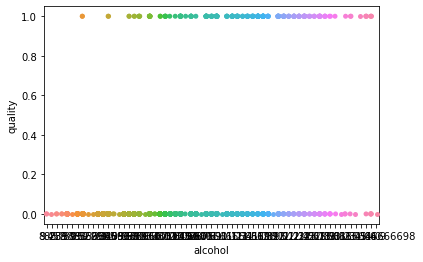

In [112]:
for i in df_continuos_columns:
    plt.figure()
    sns.stripplot(i, y = df.quality, data = df)
    plt.show()


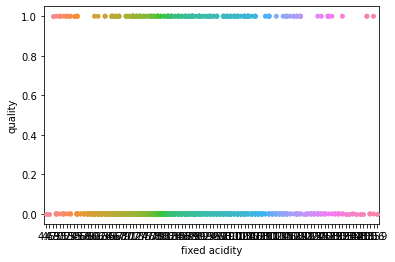

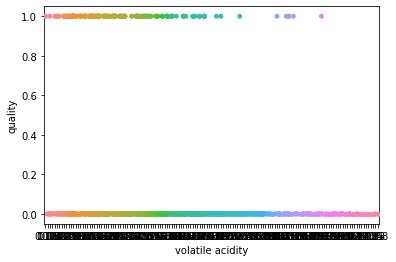

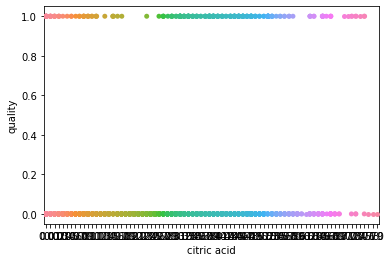

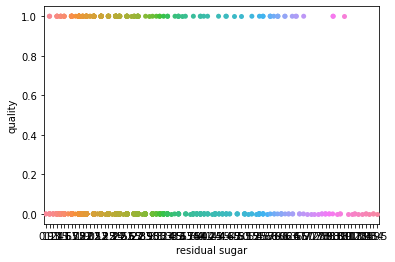

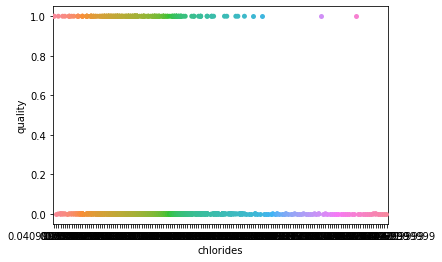

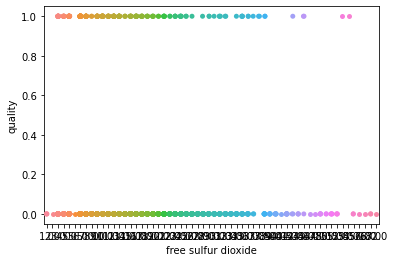

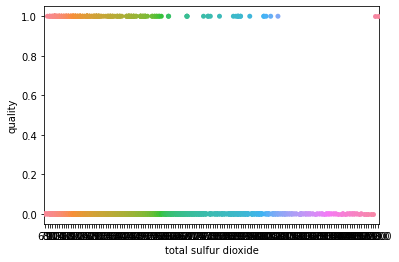

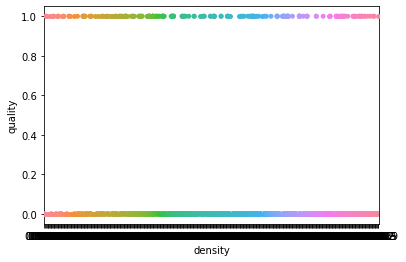

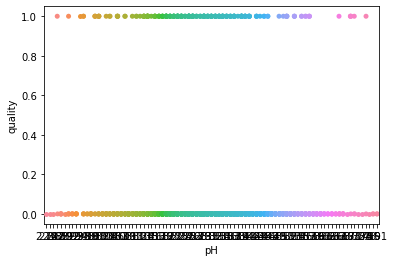

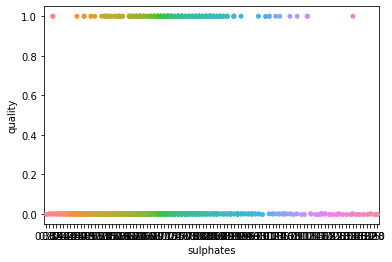

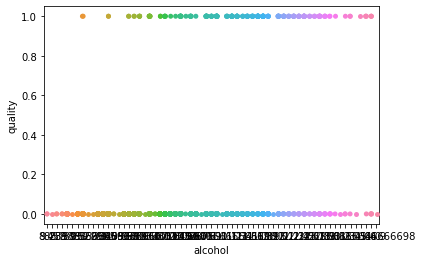

In [113]:
# Stripplot
for i in df_continuos_columns:
    plt.figure()
    sns.stripplot(i, df.quality, data = df)
    plt.show()

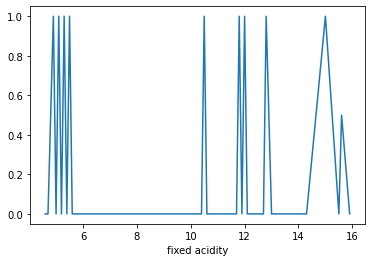

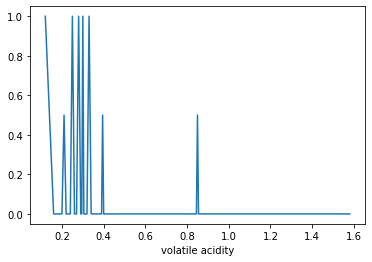

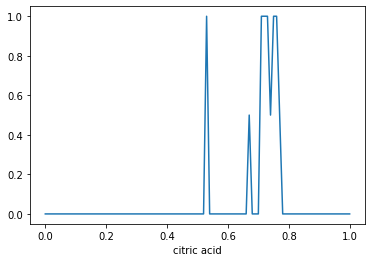

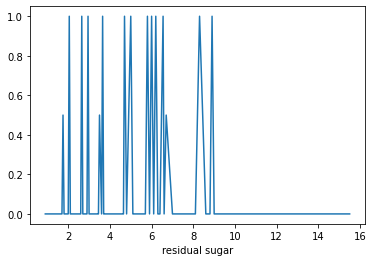

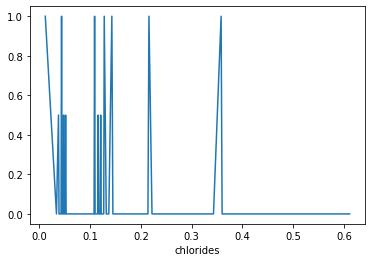

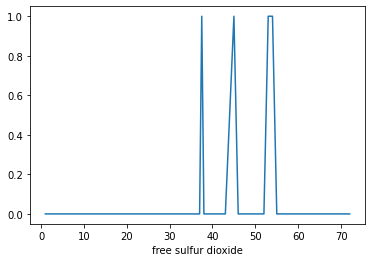

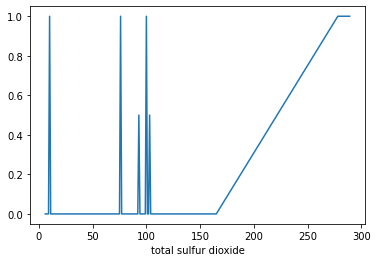

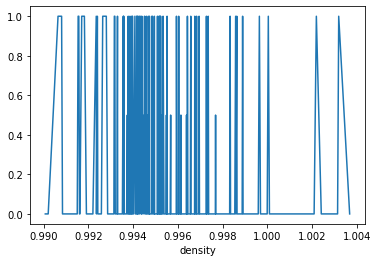

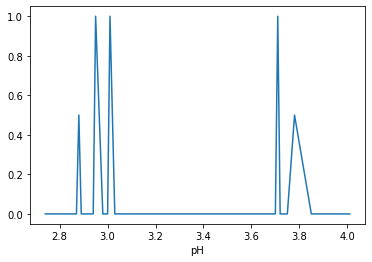

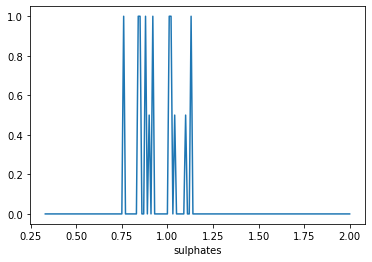

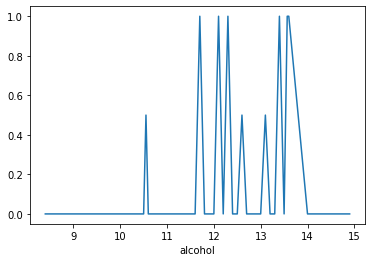

In [114]:
for i in df_continuos_columns:
    plt.figure()
    df.groupby(i)['quality'].median().plot()
    plt.show()
    
# inline plot for checking which point values are 0 or 1

### Checking which point lies with values 0 or 1 with inline plot

#### 

## Violin Plot

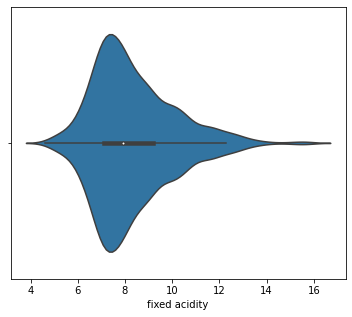

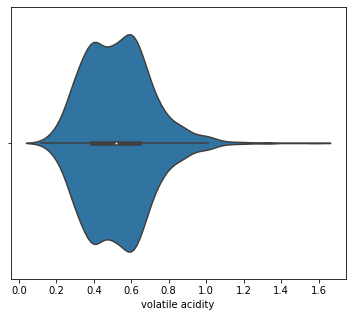

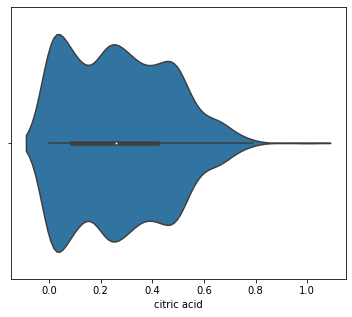

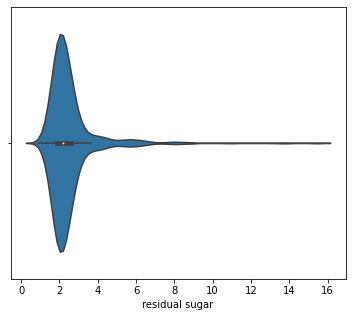

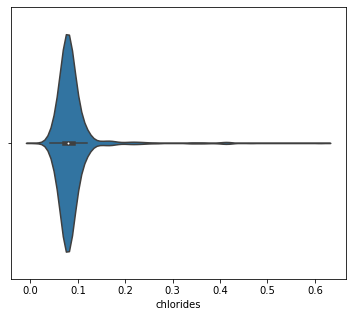

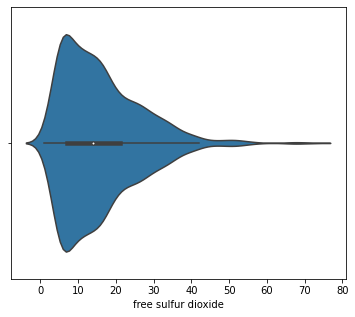

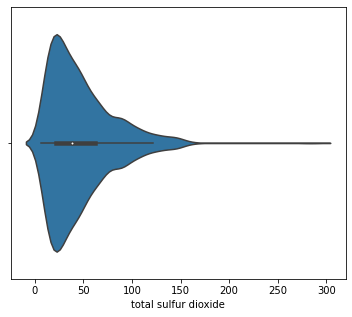

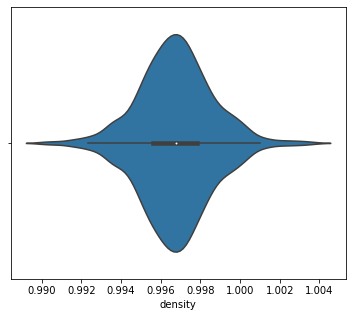

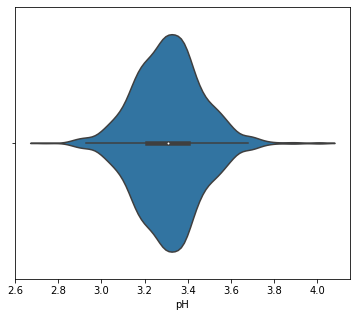

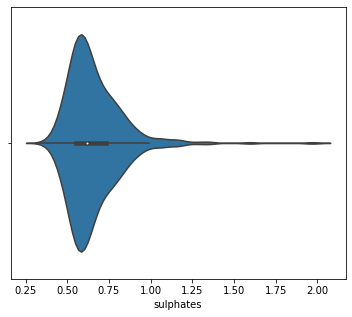

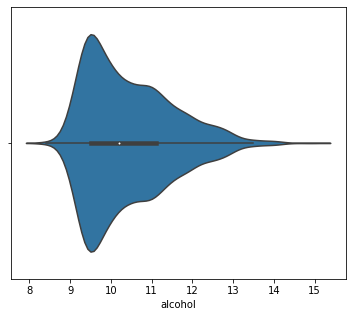

In [116]:
for i in df_continuos_columns:
    plt.figure(figsize = (6,5))
    sns.violinplot(df[i], data = df)
    plt.show()

### Above code gives information about the spreading density of the data

## Histograph

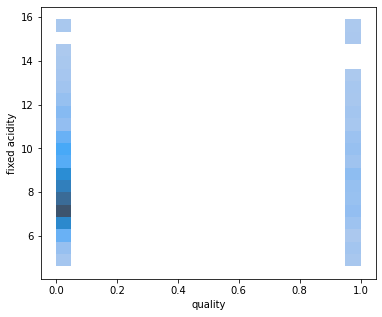

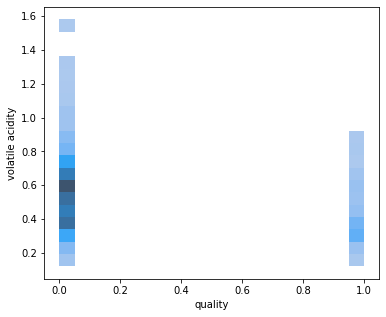

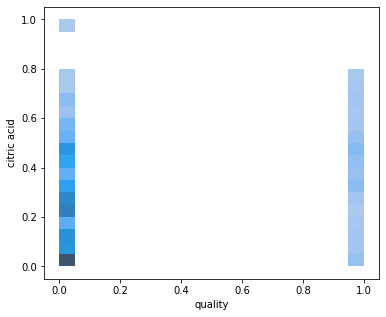

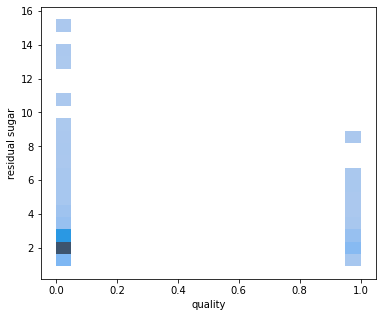

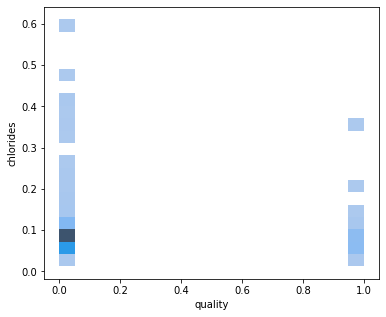

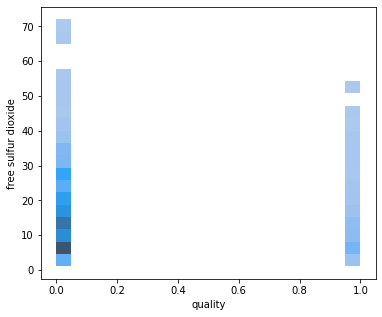

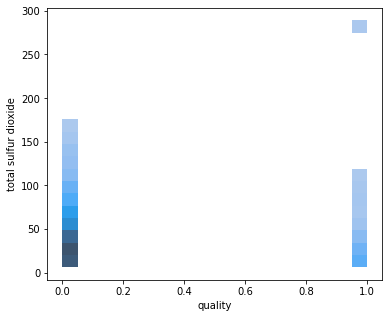

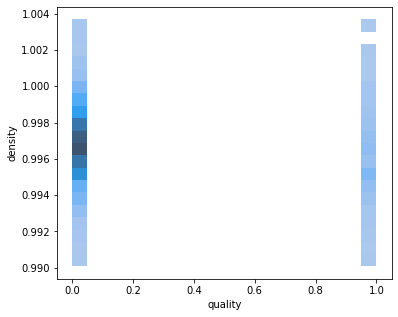

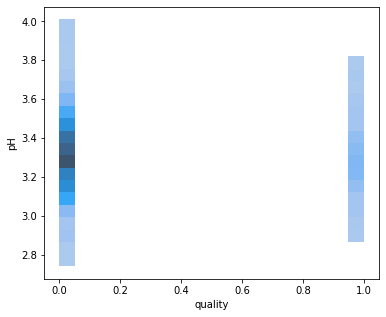

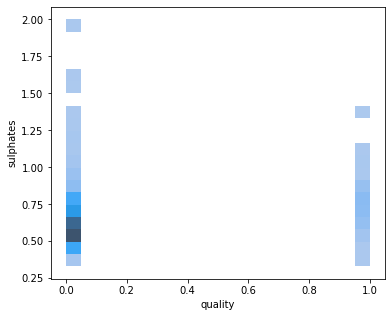

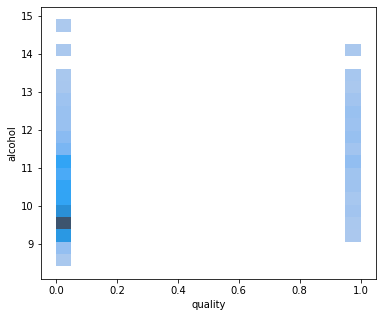

In [120]:
for i in df_continuos_columns:
    plt.figure(figsize = (6,5))
    sns.histplot(x = df['quality'], y = df[i], bins = 20)
    plt.show()

## Checking Outliers

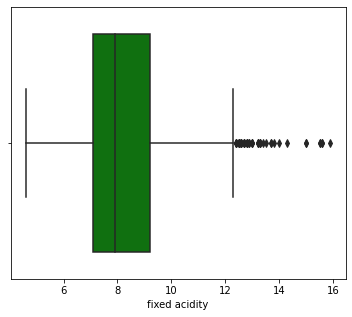

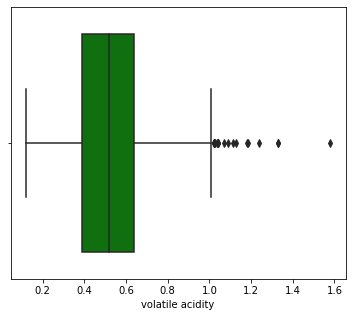

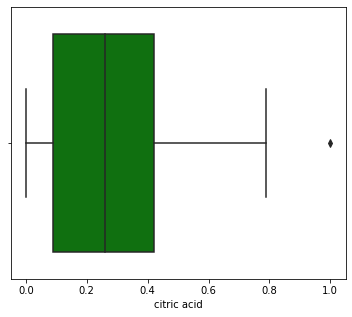

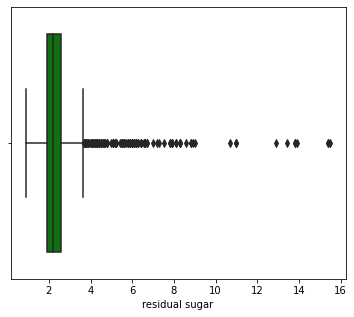

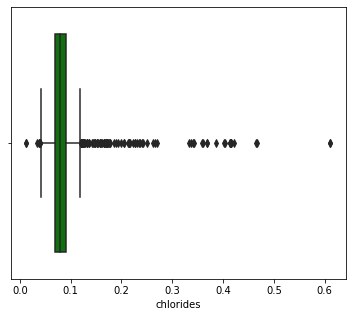

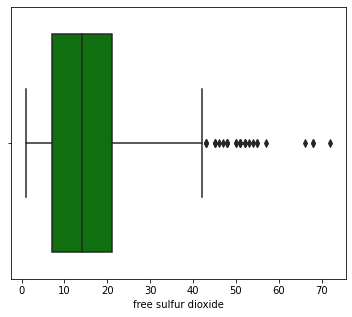

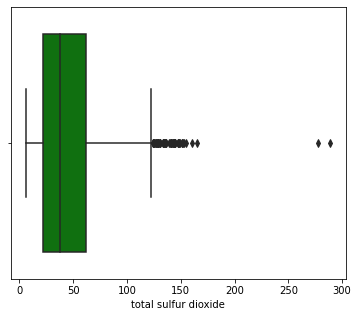

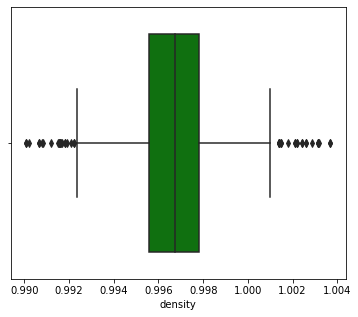

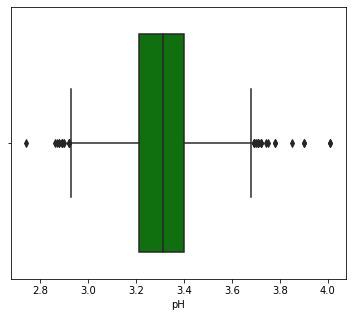

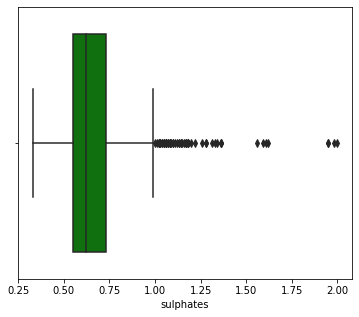

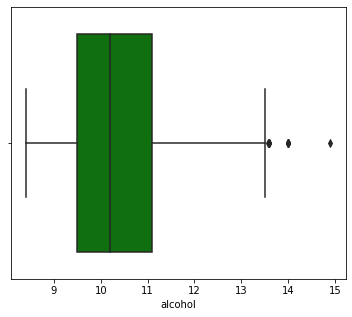

In [123]:
for i in df_continuos_columns:
    plt.figure(figsize = (6,5))
    sns.boxplot(df[i], orient='v', color='green',)
    plt.show()

#### From above code we can observed that every dataset columns having outliers

### Checking skewness

In [124]:
df[df_continuos_columns].skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

#### From above code we can find that residual sugar, chlorides ,sulphates having high skewness in the dataset

#### 

<Figure size 72x36 with 0 Axes>

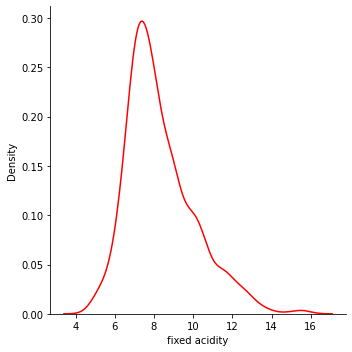

<Figure size 72x36 with 0 Axes>

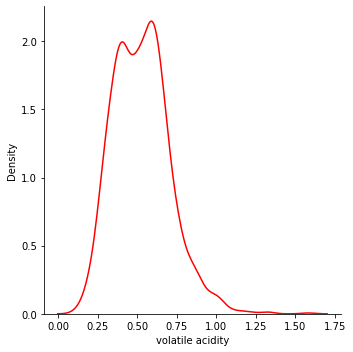

<Figure size 72x36 with 0 Axes>

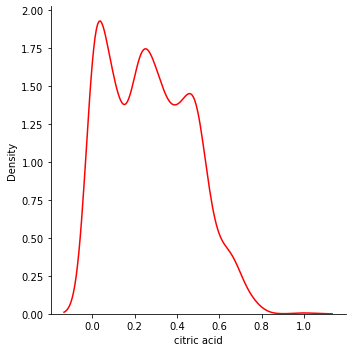

<Figure size 72x36 with 0 Axes>

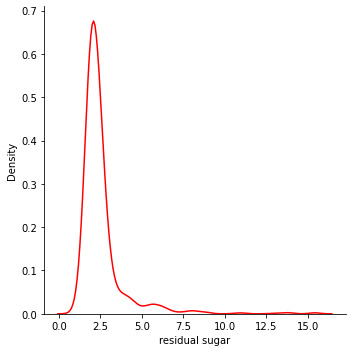

<Figure size 72x36 with 0 Axes>

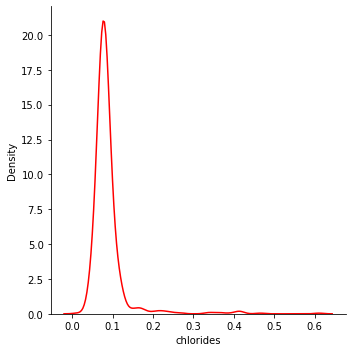

<Figure size 72x36 with 0 Axes>

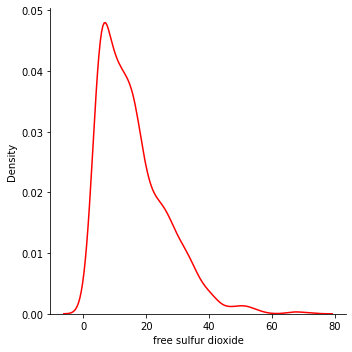

<Figure size 72x36 with 0 Axes>

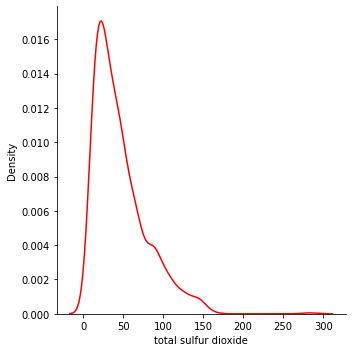

<Figure size 72x36 with 0 Axes>

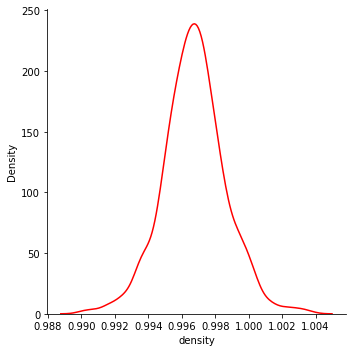

<Figure size 72x36 with 0 Axes>

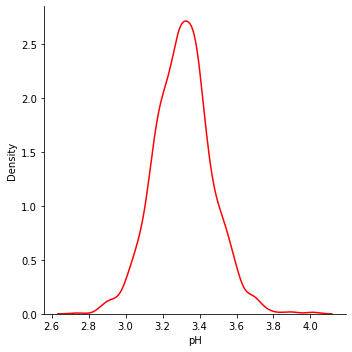

<Figure size 72x36 with 0 Axes>

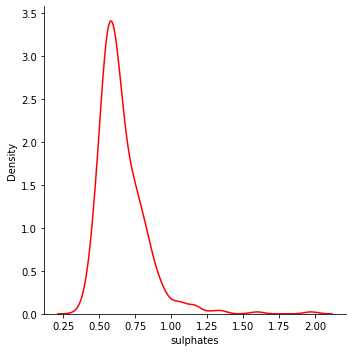

<Figure size 72x36 with 0 Axes>

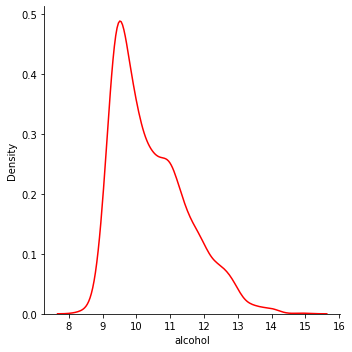

In [125]:
for i in df_continuos_columns:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)
    plt.show()

#### fixed acidity, volatile acidity, citric acid, residual sugar, chlorides free sulfur dioxide, total sulfur dioxide, sulphates, alcohol are right skewed in nature

#### 

### Checking Distribution of the dataset

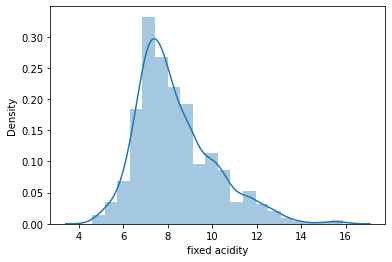

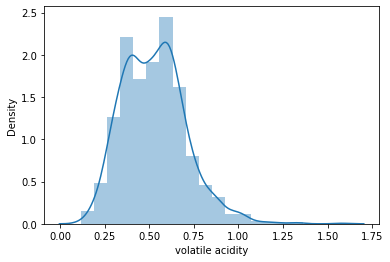

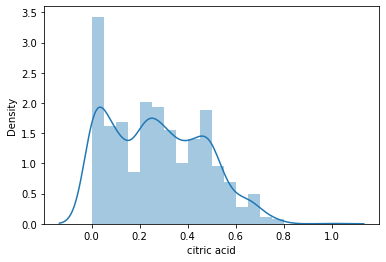

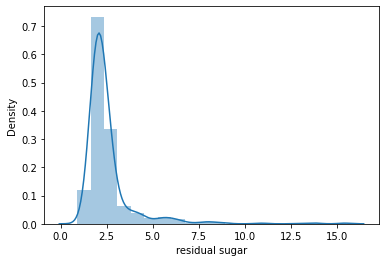

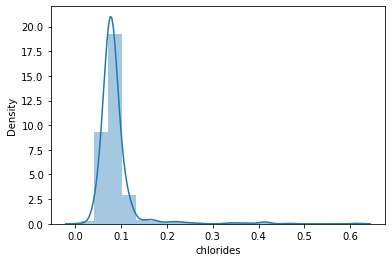

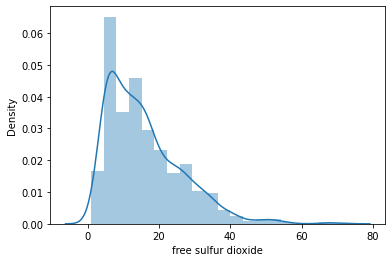

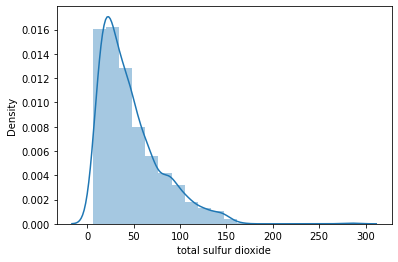

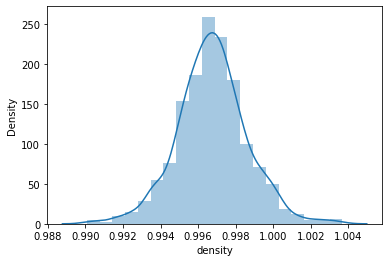

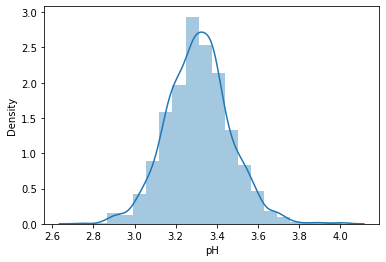

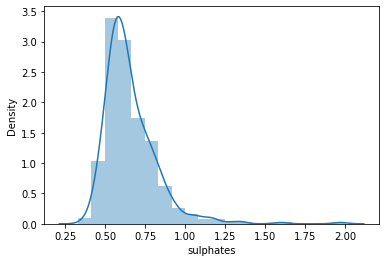

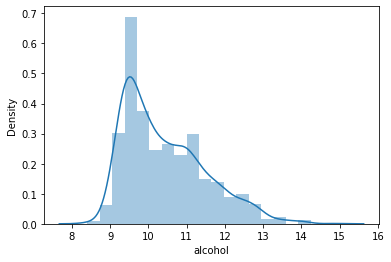

In [126]:
for i in df_continuos_columns:
    plt.figure()
    sns.distplot(df[i], bins = 20)

## Pairplot

<Figure size 1440x1440 with 0 Axes>

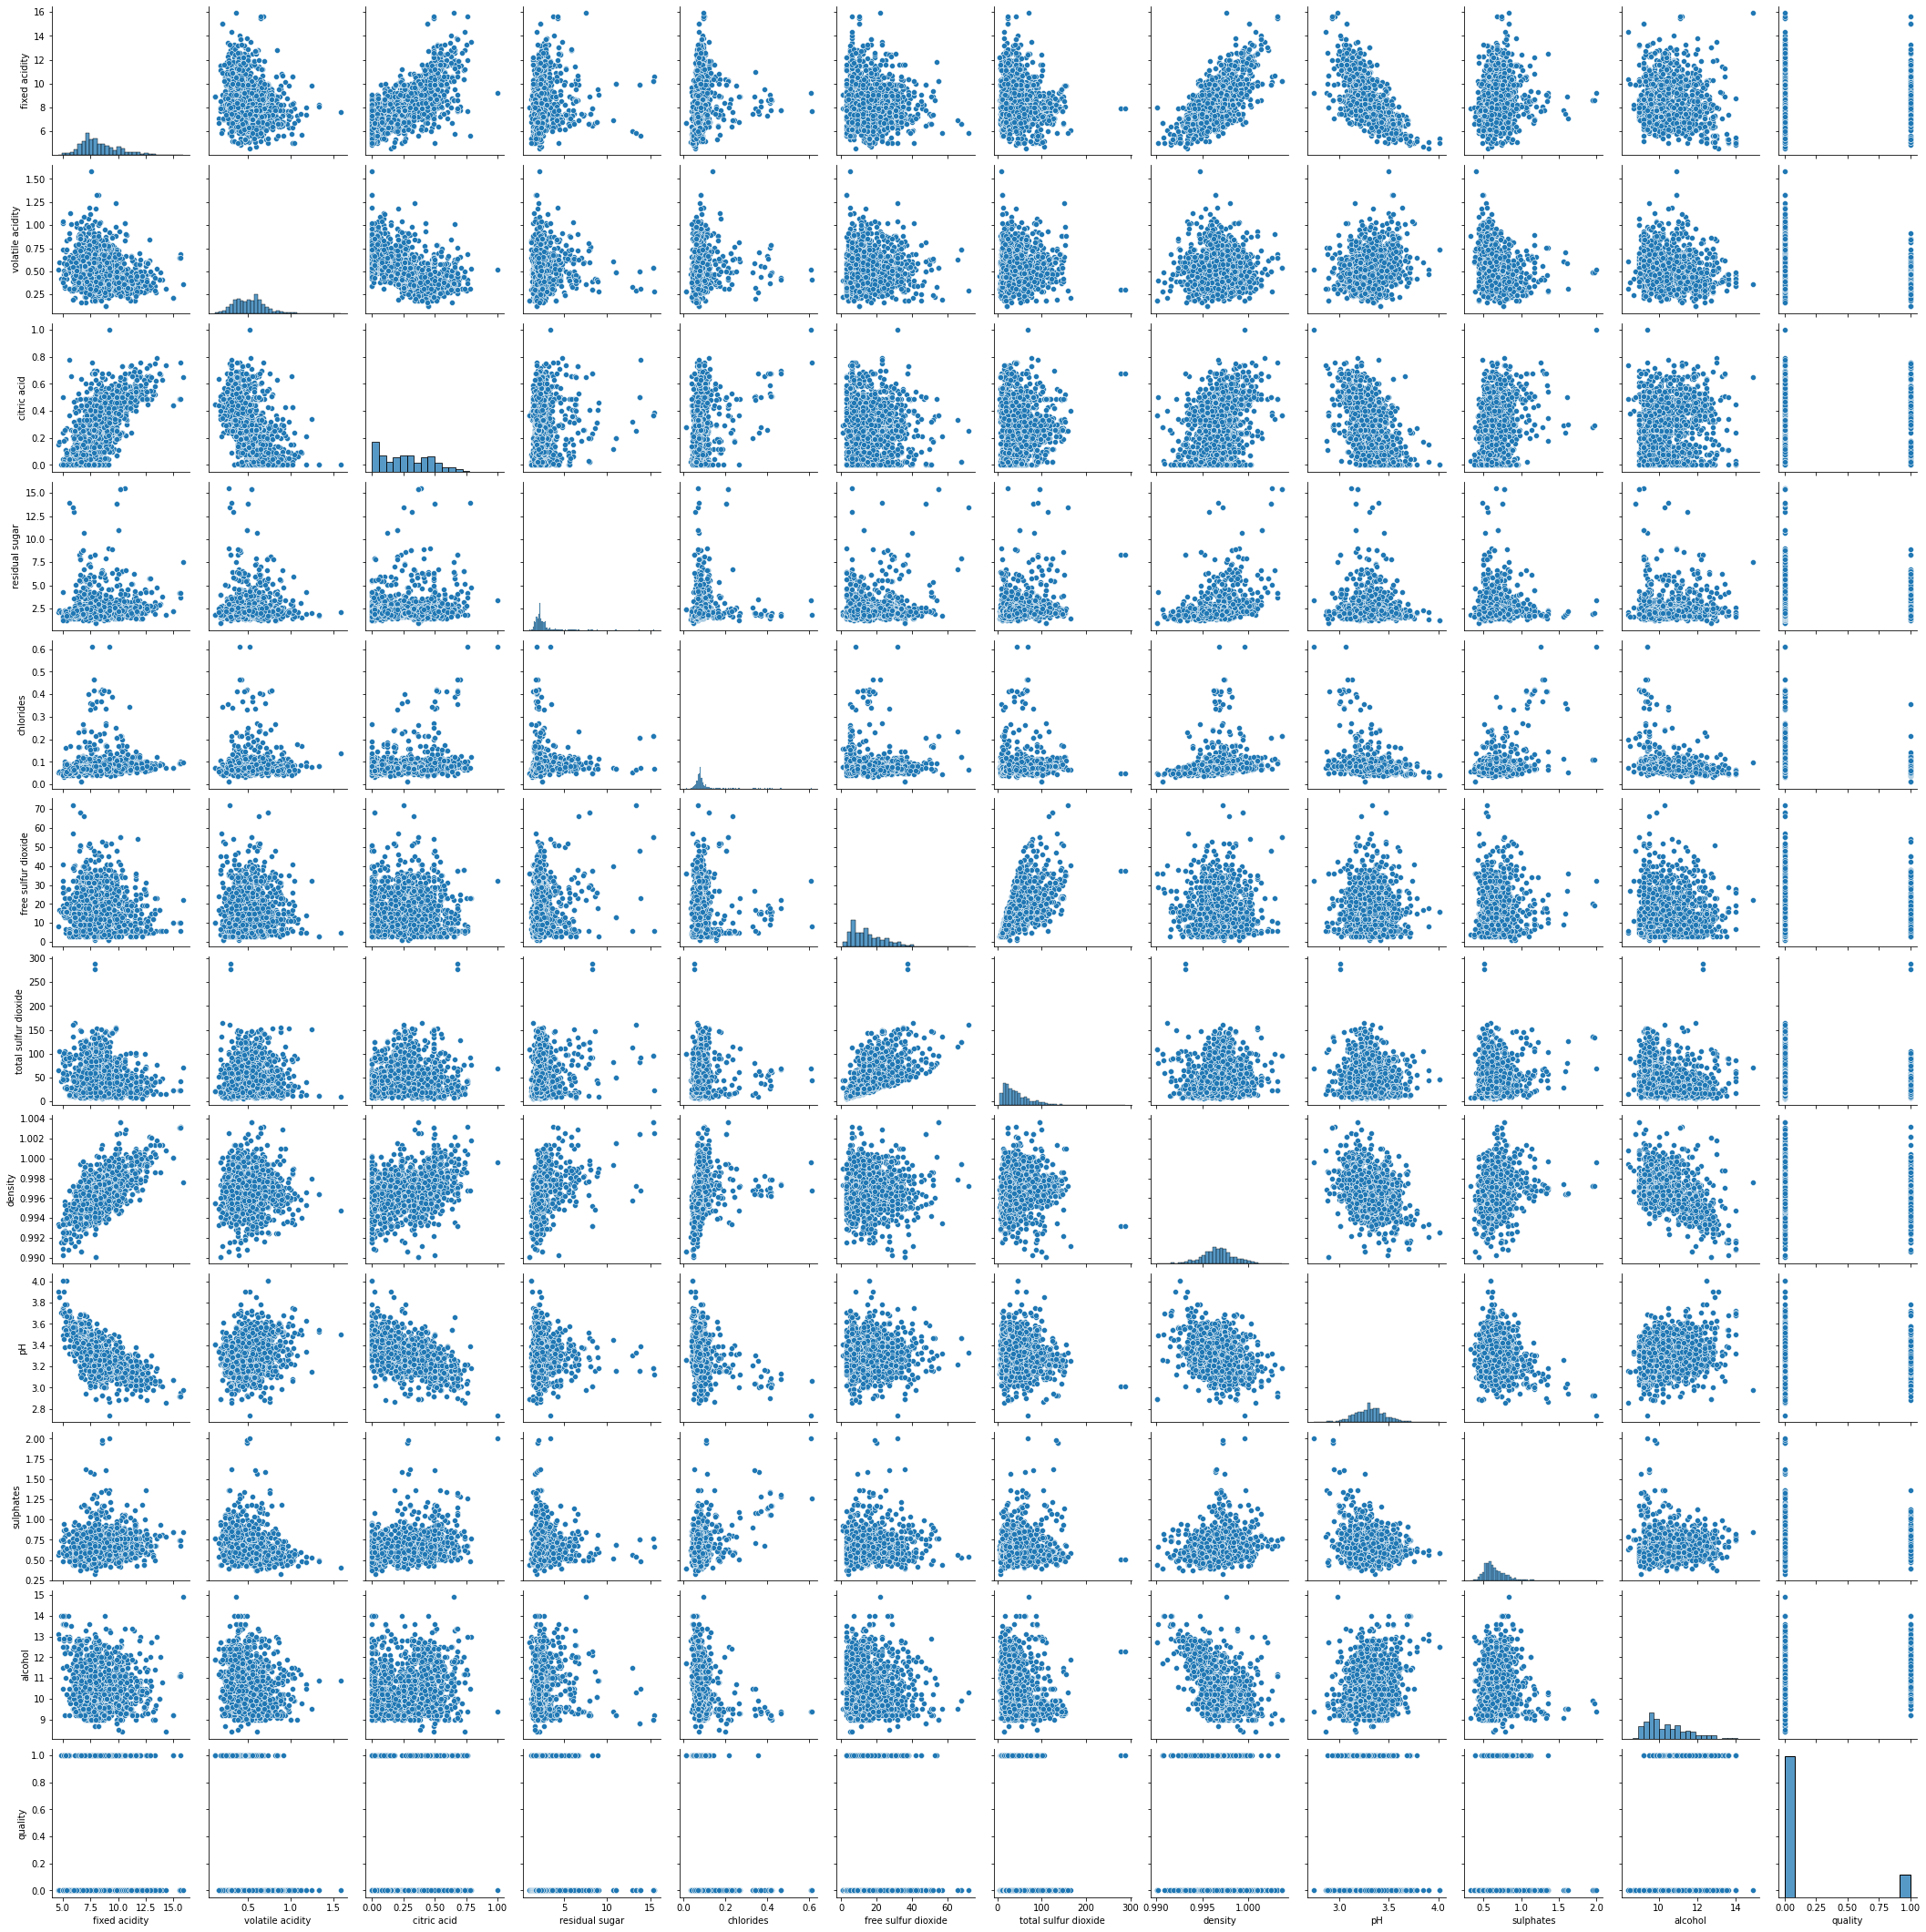

In [128]:
plt.figure(figsize = (20,20))
sns.pairplot(df)

### Checking overall glimpses of the dataset

#### 

In [324]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

<AxesSubplot:>

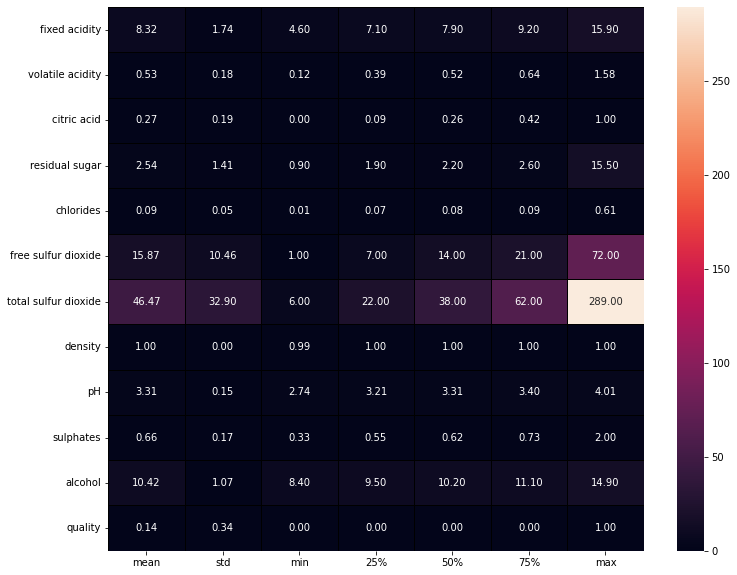

In [325]:
plt.figure(figsize = (12,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths='0.5', fmt = '.2f')

#checking description visually

#### From above code we having a short glimpse of the data set that

Max values of dataset residual sugar, free sulfure dioxide and total sulfur dioxide are 15.5, 72.0 and 289.0 respectively.
While there means are very low which indicates that dataset having outlier present in above mentioned columns

#### 

## Checking correlation of the dataset

In [326]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.042075  0.047779  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
quality               0.407315  1.000000

<AxesSubplot:>

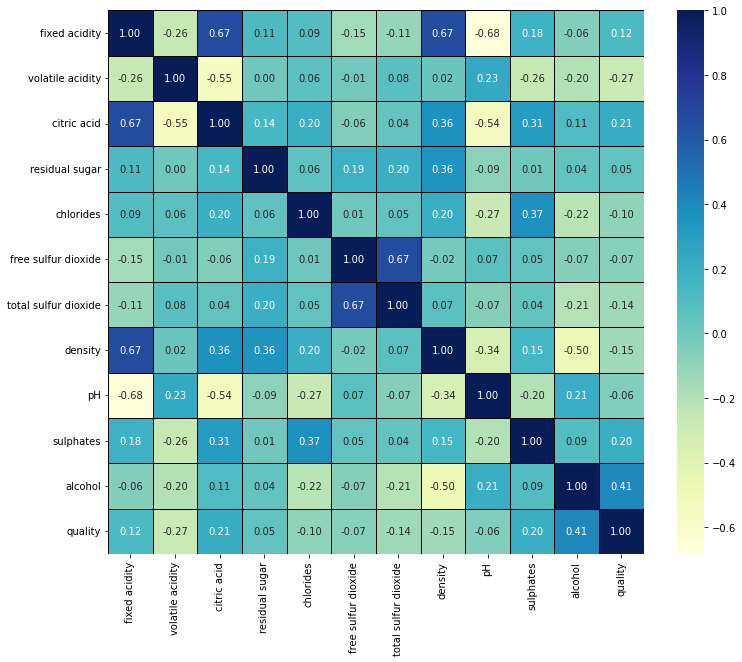

In [327]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 0.5, fmt = '.2f', cmap="YlGnBu" )

#checking correlation visually

## Checking the columns with are positively and negatively correlated with the quality of wine

<AxesSubplot:>

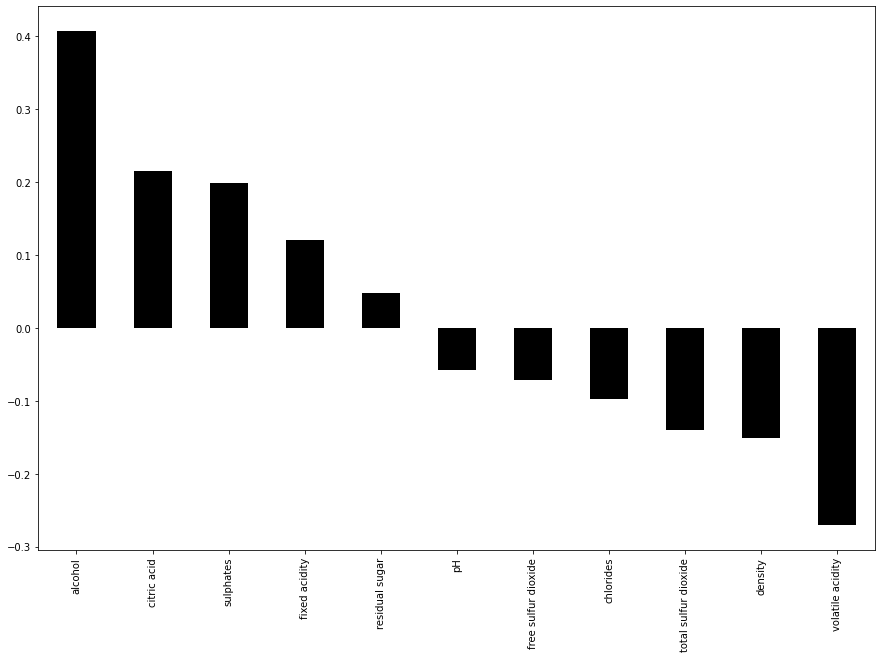

In [328]:
plt.figure(figsize = (15,10))
df.corr()['quality'].sort_values(ascending = False).drop('quality').plot(kind = 'bar', color = 'k')

### From above code we can easily find out that pH, free sulfur dioxide, chlorides, total sulfur dioxide, density, volatile acidity having negative correlation with the dataset

#### 

## Removing Outliers from the Dataset

In [22]:
from scipy.stats import zscore

z = np.abs(zscore(df))

#print(np.where(z>3))
# thresold value = 3

df_new = df[(z<3).all(axis = 1)]

In [23]:
# print(df.shape) ------->(1599, 12)
# print(df_new.shape)---------> (1458, 12)

#### Percentage of Data loss

In [24]:
print("Percentage of Data loss- ", (1599-1458)/1599*100)

Percentage of Data loss-  8.818011257035648


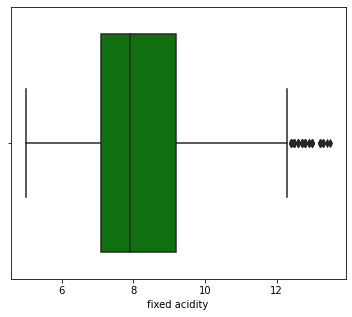

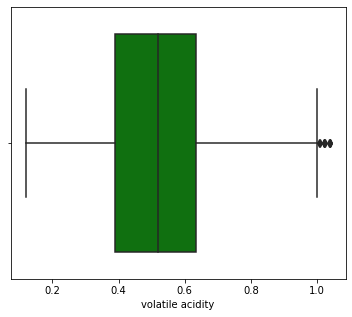

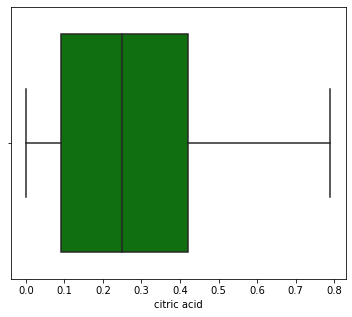

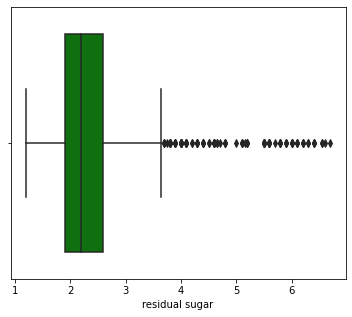

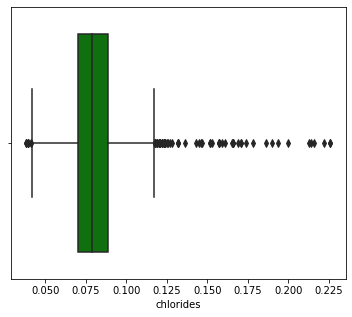

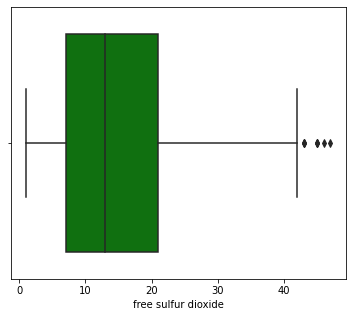

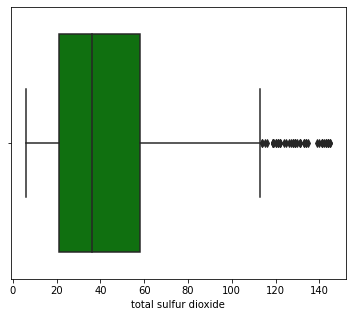

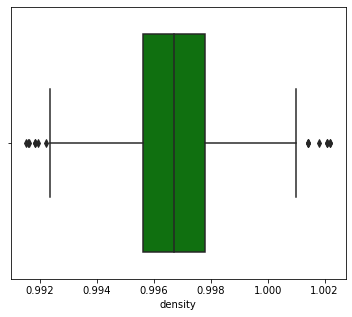

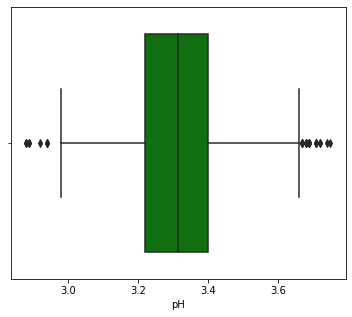

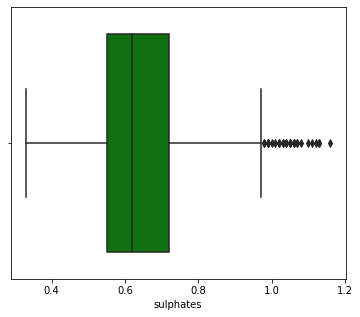

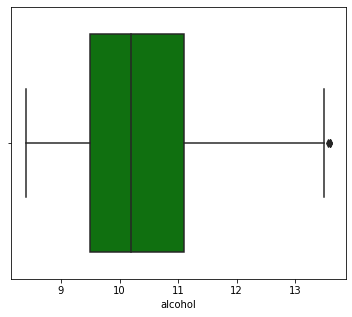

In [25]:
for i in df_continuos_columns:
    plt.figure(figsize = (6,5))
    sns.boxplot(df_new[i], orient='v', color='green',)
    plt.show()

#### From above graph still some outliers are present in the dataset

#### 

## Removing outliers with Inter Quartile Method

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [27]:
df_IQR = df[~((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR))).any(axis = 1)]

In [28]:
#df_IQR.shape--------->  (1179, 12)

In [29]:
print("Percentage of Data loss- ", (1599-1179)/1599*100)

Percentage of Data loss-  26.26641651031895


### IQR method shows higher value of Data Loss hence we are considering Z score method for outliers removal

#### 

In [30]:
df = df_new   # using zscore dataframe
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

## Divinding Data for Feature Selection

In [31]:
x  = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### 

## Removing skewness

In [32]:
from sklearn.preprocessing import power_transform

skew_x = power_transform(x, method = 'yeo-johnson')

In [33]:
skew_data = pd.DataFrame(x, columns = x.columns)
skew_data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

<Figure size 432x288 with 0 Axes>

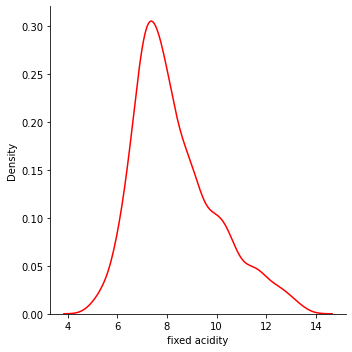

<Figure size 432x288 with 0 Axes>

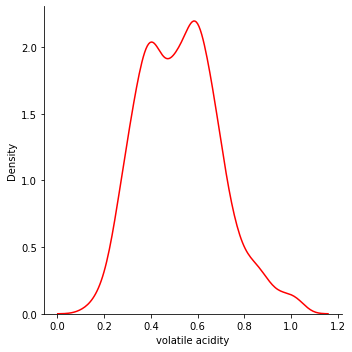

<Figure size 432x288 with 0 Axes>

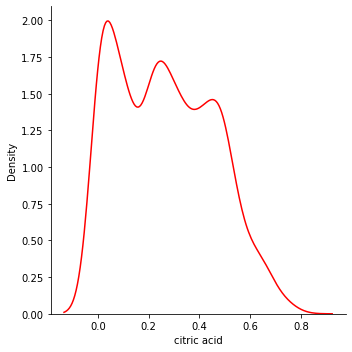

<Figure size 432x288 with 0 Axes>

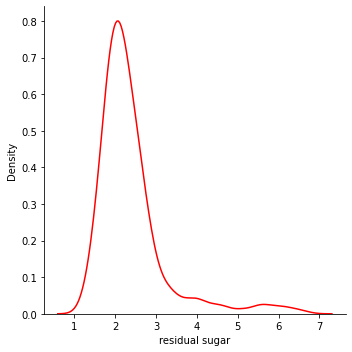

<Figure size 432x288 with 0 Axes>

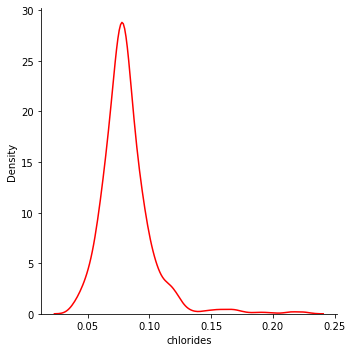

<Figure size 432x288 with 0 Axes>

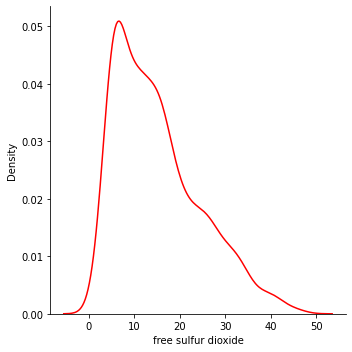

<Figure size 432x288 with 0 Axes>

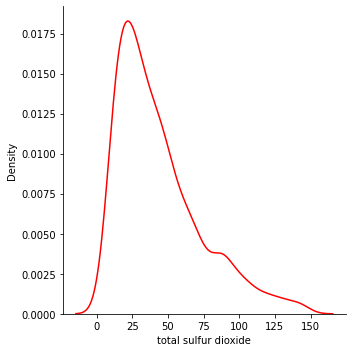

<Figure size 432x288 with 0 Axes>

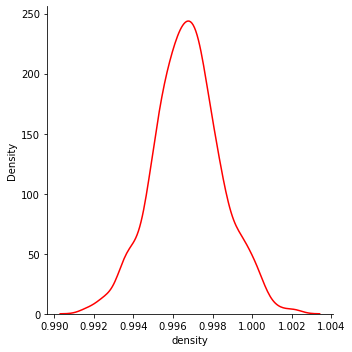

<Figure size 432x288 with 0 Axes>

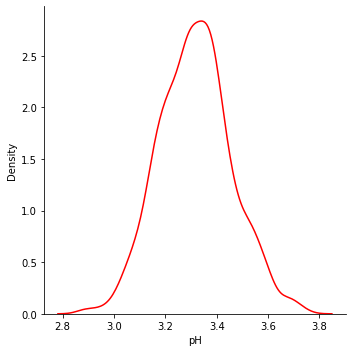

<Figure size 432x288 with 0 Axes>

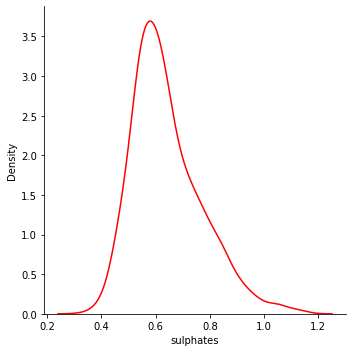

<Figure size 432x288 with 0 Axes>

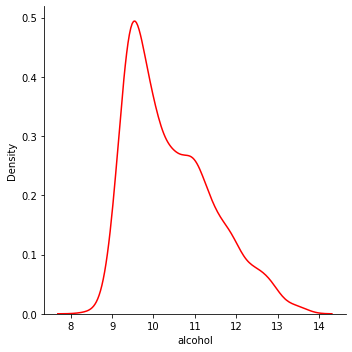

In [34]:
for i in skew_data.columns:
    plt.figure()
    sns.displot(skew_data[i], kind = 'kde', color = 'r')

In [35]:
x = skew_data

## Checking Mutlicollinearity of dataset

In [36]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variance'] = x.columns
    vif['VIF factor'] = [variance_inflation_factor(x.values, i ) for i in range(x.shape[1])]
    return vif

In [38]:
calc_vif(x)

Variance   VIF factor
0          fixed acidity    89.062951
1       volatile acidity    19.516207
2            citric acid     9.358509
3         residual sugar     9.848772
4              chlorides    17.793186
5    free sulfur dioxide     6.992696
6   total sulfur dioxide     6.938010
7                density  1691.718249
8                     pH  1239.248523
9              sulphates    31.829770
10               alcohol   141.892322

#### From above observation we can see that density shows very high multicollinearity with respect to other columns dataset hence we need to remove it

In [39]:
x1 = skew_data.drop('density', inplace = True, axis = 1)   # Density dataset drop

In [43]:
x = pd.DataFrame(x, columns = x.columns)
calc_vif(x)

Variance  VIF factor
0         fixed acidity   49.219057
1      volatile acidity   19.513319
2           citric acid    9.328343
3        residual sugar    9.785643
4             chlorides   17.241402
5   free sulfur dioxide    6.952802
6  total sulfur dioxide    6.655285
7                    pH  187.744377
8             sulphates   31.751823
9               alcohol  137.329092

### We find that after droping density VIF value of the pH also decreases hence for lower dataloss we skip pH to drop

In [44]:
x.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  
0                 11.0                  34.0  3.51       0.56      9.4  
1                 25.0                  67.0  3.20       0.68      9.8

<AxesSubplot:>

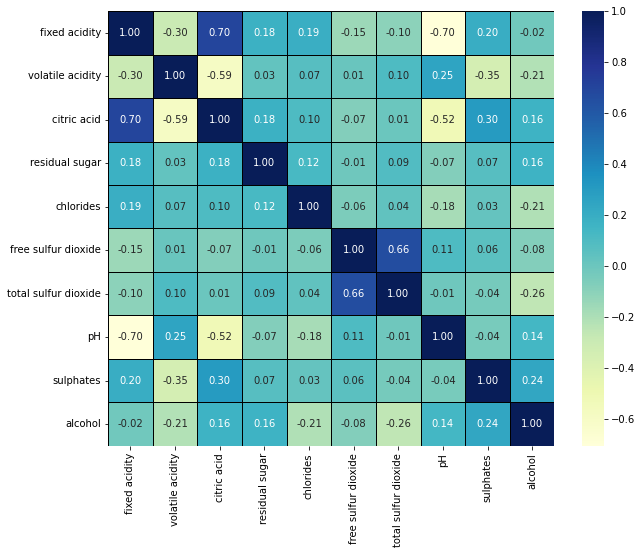

In [45]:
plt.figure(figsize = (10,8))
sns.heatmap(x.corr(), annot = True, linecolor = 'black', linewidths = 0.5, fmt = '.2f', cmap="YlGnBu" )

# SMOTE: Synthetic Minority Over-sampling Technique

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smt = SMOTE()
x, y = smt.fit_resample(x, y)

0    1257
1    1257
Name: quality, dtype: int64


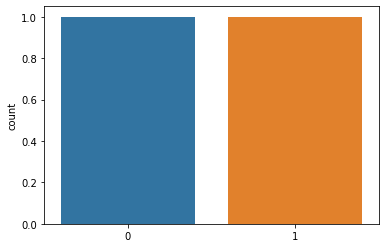

In [48]:
sns.countplot(y.unique())
print(y.value_counts())

# Scaling Dataset

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [52]:
print(y.shape, x.shape)

(2514,) (2514, 10)


In [53]:
x = x_scaler

# Feature Selection

Since output variables having continuos variables hence we use classification model

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        
        
    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value  )

# Model 1 Logistic Regression

In [57]:
model = LogisticRegression()

In [58]:
best_model.best_fit(x, y, model)

At random_state:- 9
Training accuracy_score is:- 83.14271506713078
Testing accuracy_score is:- 83.1013916500994


At random_state:- 16
Training accuracy_score is:- 83.09298856290403
Testing accuracy_score is:- 83.1013916500994


At random_state:- 56
Training accuracy_score is:- 82.69517652909
Testing accuracy_score is:- 82.7037773359841


At random_state:- 106
Training accuracy_score is:- 83.14271506713078
Testing accuracy_score is:- 83.1013916500994


At random_state:- 118
Training accuracy_score is:- 83.29189457981104
Testing accuracy_score is:- 83.30019880715706


At random_state:- 159
Training accuracy_score is:- 83.29189457981104
Testing accuracy_score is:- 83.30019880715706


At random_state:- 184
Training accuracy_score is:- 82.94380905022378
Testing accuracy_score is:- 82.90258449304176


Best fit random_state_values [9, 16, 56, 106, 118, 159, 184]


In [59]:
best_model.final_model(x, y, model, 56)  # at random state 56 model shows best accuracy

At random state 56 model giving best accuracy score 

Training accuracy:-  82.69517652909
Testing accuracy:-  82.7037773359841


--------------------------------------
Confusion Matrix
[[192  42]
 [ 45 224]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       234
           1       0.84      0.83      0.84       269

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.83      0.83      0.83       503



In [66]:
best_model.cross_val_score(model, x, y)

cross_val_score 78.83850437549722 at cv = 2
cross_val_score 81.02625298329356 at cv = 3
cross_val_score 81.02386762933784 at cv = 4
cross_val_score 81.82165968333426 at cv = 5
cross_val_score 81.62291169451073 at cv = 6
cross_val_score 81.58033779900074 at cv = 7


#### 

## Model 2 KNeighborClassifier

In [67]:
model = KNeighborsClassifier()

In [68]:
best_model.best_fit(x, y, model)

At random_state:- 105
Training accuracy_score is:- 91.54649428145201
Testing accuracy_score is:- 91.45129224652088


At random_state:- 149
Training accuracy_score is:- 91.29786176031826
Testing accuracy_score is:- 91.25248508946322


At random_state:- 182
Training accuracy_score is:- 91.49676777722526
Testing accuracy_score is:- 91.45129224652088


At random_state:- 196
Training accuracy_score is:- 91.14868224763799
Testing accuracy_score is:- 91.05367793240556


Best fit random_state_values [105, 149, 182, 196]


In [69]:
best_model.final_model(x, y, model, 105)   # at random state 105 model shows best accuracy

At random state 105 model giving best accuracy score 

Training accuracy:-  91.54649428145201
Testing accuracy:-  91.45129224652088


--------------------------------------
Confusion Matrix
[[212   5]
 [ 38 248]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       217
           1       0.98      0.87      0.92       286

    accuracy                           0.91       503
   macro avg       0.91      0.92      0.91       503
weighted avg       0.92      0.91      0.91       503



In [70]:
best_model.cross_val_score(model, x, y)

cross_val_score 80.50914876690534 at cv = 2
cross_val_score 83.81066030230708 at cv = 3
cross_val_score 84.44408017984264 at cv = 4
cross_val_score 84.76471846213555 at cv = 5
cross_val_score 85.00397772474145 at cv = 6
cross_val_score 85.35968519255427 at cv = 7


## Hyper Parameter Tuning for DTC criterion

In [76]:
# using hyper parameter tuning for decision tree regressor to find out best criterion


model = DecisionTreeClassifier()
param = {'criterion': ['gini', 'entropy']}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

{'criterion': 'gini'}

{'criterion': 'gini'}

# Model 3 DecisionTreeClassifier

In [77]:
model = DecisionTreeClassifier(criterion = 'gini')

In [79]:
best_model.best_fit(x, y, model)    

Best fit random_state_values []


### From above code we find that model is not performing well to match its training and testing accuracy

#### 

## Hyper Parameter Tuning for Support Vector Classifiers

In [80]:
model = SVC()
param = {'kernel': ['linear', 'rbf', 'poly']}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_


# {'kernel': 'rbf'}

{'kernel': 'rbf'}

## Model 4 Support Vector Classifiers

In [81]:
model = SVC(kernel = 'rbf')

In [82]:
best_model.best_fit(x, y, model)

At random_state:- 5
Training accuracy_score is:- 90.70114370959722
Testing accuracy_score is:- 90.65606361829026


At random_state:- 81
Training accuracy_score is:- 90.5022376926902
Testing accuracy_score is:- 90.4572564612326


At random_state:- 170
Training accuracy_score is:- 90.3033316757832
Testing accuracy_score is:- 90.25844930417495


Best fit random_state_values [5, 81, 170]


In [83]:
best_model.final_model(x, y, model, 5)   # at random state 5 model shows best accuracy

At random state 5 model giving best accuracy score 

Training accuracy:-  90.70114370959722
Testing accuracy:-  90.65606361829026


--------------------------------------
Confusion Matrix
[[218  15]
 [ 32 238]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       233
           1       0.94      0.88      0.91       270

    accuracy                           0.91       503
   macro avg       0.91      0.91      0.91       503
weighted avg       0.91      0.91      0.91       503



In [84]:
best_model.cross_val_score(model, x, y)

cross_val_score 82.93556085918854 at cv = 2
cross_val_score 86.2370723945903 at cv = 3
cross_val_score 86.95096604660112 at cv = 4
cross_val_score 86.6750889087784 at cv = 5
cross_val_score 86.71439936356404 at cv = 6
cross_val_score 87.34823362957067 at cv = 7


## Hyper Parameter Tuning for Stocastic Descent Classifiers to minimize cost function

In [85]:
model = SGDClassifier()
param = {'alpha': [0.1,.01,.001]}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

{'alpha': 0.001}

## Model 5 SGD Classifier

In [86]:
model = SGDClassifier(alpha = 0.001)

In [87]:
best_model.best_fit(x, y, model)

At random_state:- 55
Training accuracy_score is:- 83.34162108403778
Testing accuracy_score is:- 83.30019880715706


At random_state:- 167
Training accuracy_score is:- 83.14271506713078
Testing accuracy_score is:- 83.1013916500994


At random_state:- 186
Training accuracy_score is:- 83.68970661362506
Testing accuracy_score is:- 83.69781312127238


At random_state:- 189
Training accuracy_score is:- 82.54599701640974
Testing accuracy_score is:- 82.50497017892644


Best fit random_state_values [55, 167, 186, 189]


In [88]:
best_model.final_model(x, y, model, 186)   # at random state 5 model shows best accuracy

At random state 186 model giving best accuracy score 

Training accuracy:-  83.24216807558429
Testing accuracy:-  82.90258449304176


--------------------------------------
Confusion Matrix
[[209  32]
 [ 54 208]]


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       241
           1       0.87      0.79      0.83       262

    accuracy                           0.83       503
   macro avg       0.83      0.83      0.83       503
weighted avg       0.83      0.83      0.83       503



# From above 5 Models trainig testing we conclude that KNeighbor Classifiers shows good accuracy score then rest all models

In [90]:
model = KNeighborsClassifier()

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 105)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", i , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 105 model shows best accuracy

At random state alcohol model giving best accuracy score 

Training accuracy:-  91.54649428145201
Testing accuracy:-  91.45129224652088


--------------------------------------
Confusion Matrix
[[212   5]
 [ 38 248]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       217
           1       0.98      0.87      0.92       286

    accuracy                           0.91       503
   macro avg       0.91      0.92      0.91       503
weighted avg       0.92      0.91      0.91       503



In [95]:
cv = cross_val_score(model, x, y, cv = 7).mean()
print('cross_val_score', cv*100,'at cv =', 7  )

cross_val_score 85.35968519255427 at cv = 7


## AUC ROC Curve:

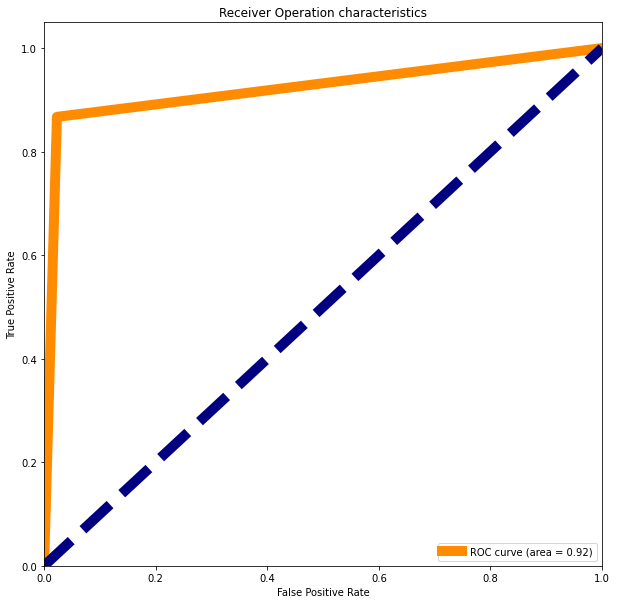

In [97]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [99]:
import pickle

filename = "wine.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [100]:
load = pickle.load(open('wine.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9145129224652088


In [101]:
conclusion = pd.DataFrame()
conclusion['Predicted Quality of Wine'] = np.array(model.predict(x_test))
conclusion['Actual Quality of Wine'] = np.array(y_test)

In [103]:
pd.set_option('display.max_rows', None)
conclusion

Predicted Quality of Wine  Actual Quality of Wine
0                            0                       0
1                            0                       0
2                            1                       0
3                            0                       0
4                            0                       0
5                            1                       1
6                            0                       0
7                            1                       1
8                            1                       1
9                            0                       0
10                           1                       1
11                           1                       1
12                           0                       0
13                           1                       0
14                           0                       0
15                           0                       0
16                           0                       0
17                           1                       1
18                           1                       1
19                           0                       0
20                           1                       1
21                           1                       1
22                           0                       0
23                           0                       0
24                           1                       1
25                           0                       0
26                           1                       1
27                           1                       1
28                           0                       0
29                           1                       1
30                           1                       0
31                           1                       0
32                           1                       1
33                           0                       0
34                           0                       0
35                           1                       0
36                           1                       1
37                           1                       0
38                           1                       1
39                           1                       1
40                           0                       0
41                           1                       1
42                           1                       1
43                           1                       1
44                           0                       0
45                           1                       1
46                           1                       1
47                           1                       1
48                           1                       1
49                           0                       0
50                           0                       0
51                           1                       1
52                           1                       1
53                           1                       1
54                           1                       0
55                           0                       0
56                           0                       0
57                           0                       0
58                           1                       1
59                           0                       0
60                           1                       1
61                           1                       1
62                           0                       0
63                           1                       1
64                           0                       0
65                           1                       1
66                           0                       0
67                           0                       0
68                           0                       0
69                           1                       1
70                           0                       0
71                           0               